# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **25.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **28.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla_{w} Q(w) = - \dfrac{2}{\ell} \left( y - Xw \right)^T  X 
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1} + \varepsilon}} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: [vanilla](https://contest.yandex.ru/contest/29933/problems/A/)


* **StochasticDescent**: [stochastic](https://contest.yandex.ru/contest/29933/problems/B/)


* **MomentumDescent**: [momentum](https://contest.yandex.ru/contest/29933/problems/C/)


* **Adam**: [adam](https://contest.yandex.ru/contest/29933/problems/D/)


* **LinearRegression**: [linear_regression](https://contest.yandex.ru/contest/29933/problems/E/)

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

Пропуски в данных отсутствуют:

In [8]:
data.isnull().any().any()

False

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


**Пункт 1.**
Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.



In [10]:
data['price'].describe()

count    241190.000000
mean       6887.741892
std        8024.451993
min           1.000000
25%        1750.000000
50%        4100.000000
75%        8999.000000
max       99999.000000
Name: price, dtype: float64

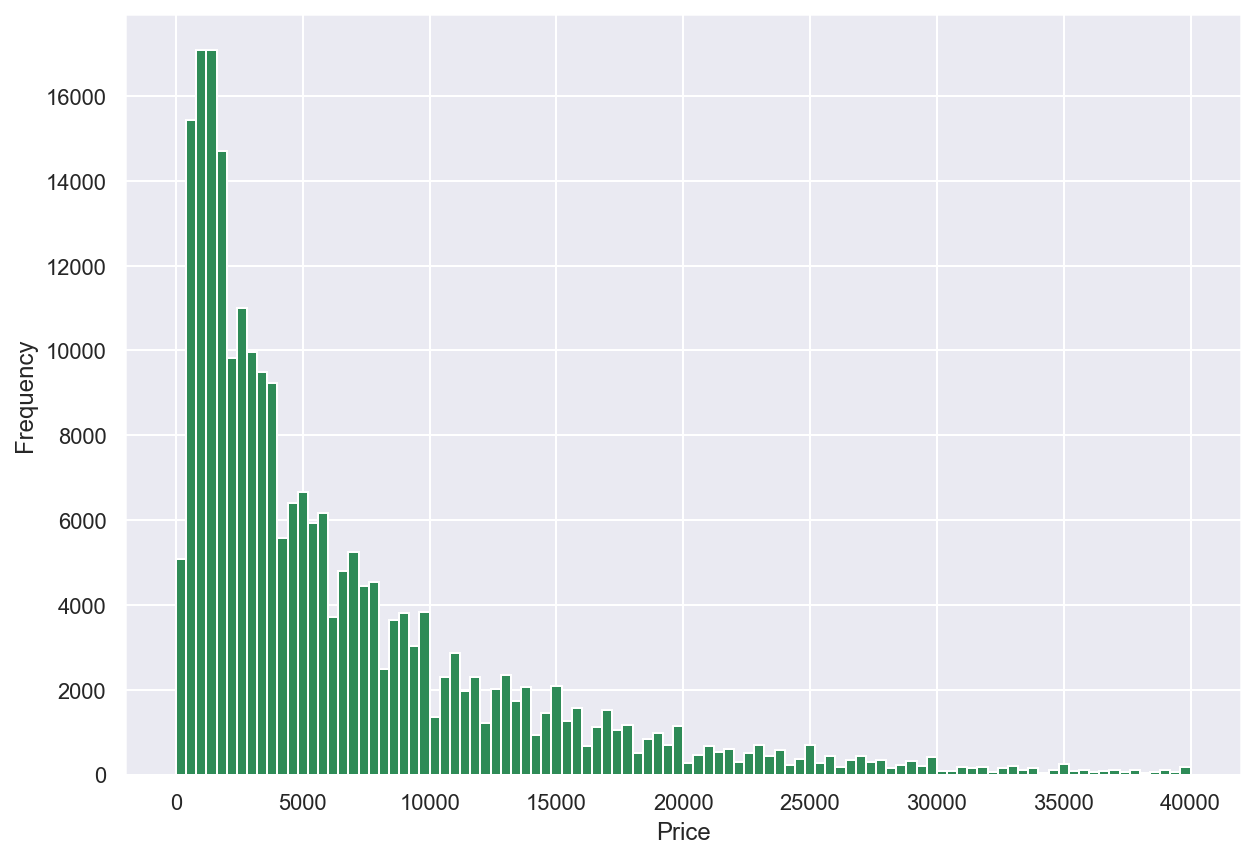

In [11]:
# посмотрим на распределение целевой переменной
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 12
plt.hist(data['price'], bins=100, color='seagreen', range=(0, 40000))
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [12]:
print(f"Outliers percentage: {np.round(data[data['price'] >= 40000].shape[0] / data.shape[0] * 100, 4)}%")

Outliers percentage: 0.7998%


Будем считать выбросами те объекты, в которых значения цены не превышают 40000 - как показывает ячейка выше, такие объекты составляют меньше одного процента во всей выборке

In [13]:
data = data[data['price'] < 40000]

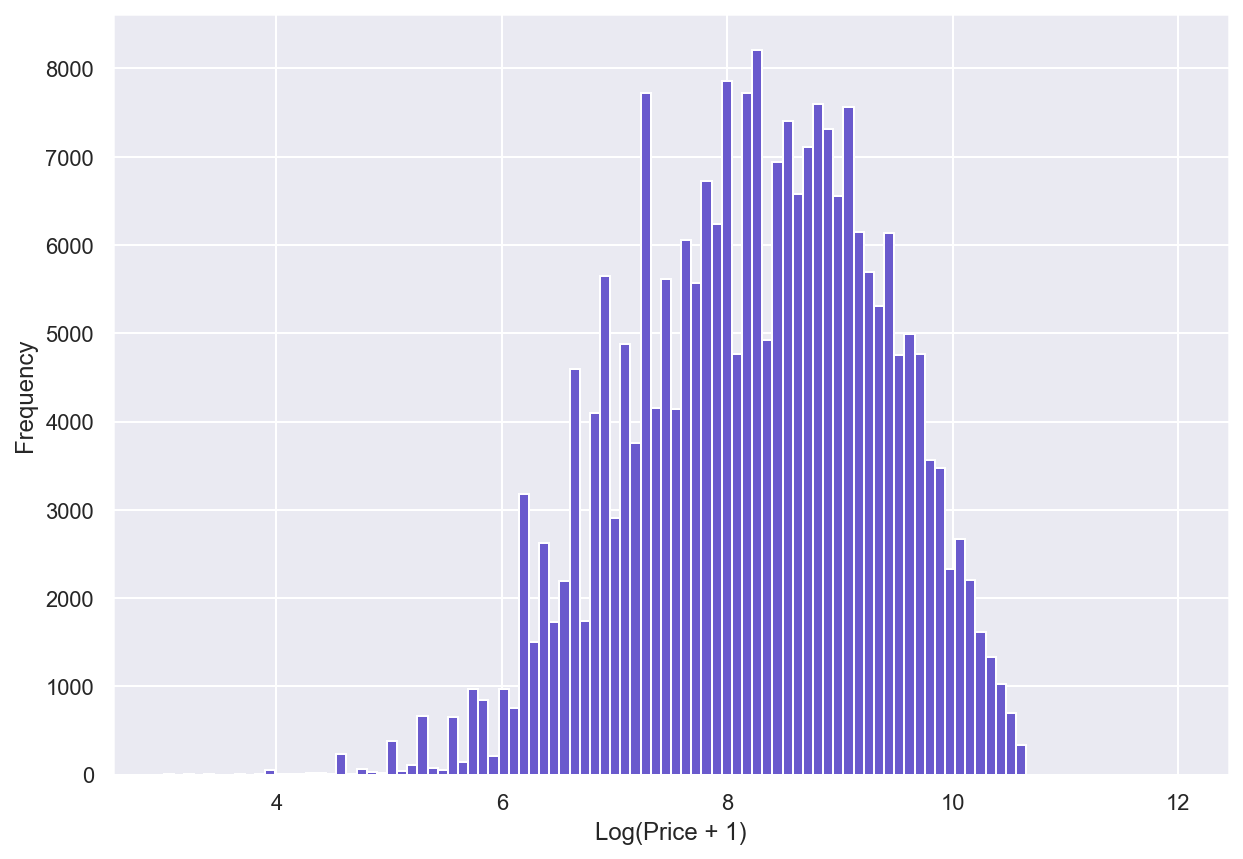

In [14]:
# а теперь на распределение логарифма целевой переменной
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 12
plt.hist(np.log1p(data['price']), bins=100, color='slateblue', range=(3, 12))
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.show()

Распределение логарифма больше похоже на нормальное, чем распределение изначальной целевой переменной, поэтому создадим новый столбец - логарифимированный таргет:

In [15]:
data['log_price'] = np.log1p(data['price'])

**Пункт 2**. Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239261 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              239261 non-null  object 
 1   model              239261 non-null  object 
 2   vehicleType        239261 non-null  object 
 3   gearbox            239261 non-null  object 
 4   fuelType           239261 non-null  object 
 5   notRepairedDamage  239261 non-null  object 
 6   powerPS            239261 non-null  int64  
 7   kilometer          239261 non-null  int64  
 8   autoAgeMonths      239261 non-null  int64  
 9   price              239261 non-null  int64  
 10  log_price          239261 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ MB


Пояснение: признак `kilometer` был выбран в качестве категориального, так как он, в отличие от вещественных признаков, принимает только ограниченное число значений и не может быть определен, как принимающий любое значение на числовой оси и ее части

In [17]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType', 'kilometer', 'notRepairedDamage', 'gearbox']
numeric = ['powerPS', 'autoAgeMonths']
other = []

In [18]:
for col in categorical:
    print(f'Cat_feature: {col}')
    print(f'Unique_val: {len(set(data[col].values))}', end='\n\n')

Cat_feature: brand
Unique_val: 38

Cat_feature: model
Unique_val: 248

Cat_feature: vehicleType
Unique_val: 8

Cat_feature: fuelType
Unique_val: 7

Cat_feature: kilometer
Unique_val: 13

Cat_feature: notRepairedDamage
Unique_val: 2

Cat_feature: gearbox
Unique_val: 2



Получаем два признака с очень большим количеством категорий - на них мы посмотрим отдельно, а для всех остальных построим графики распределения целевой переменной вместе.

In [19]:
model_gb = pd.DataFrame(data.groupby('model')['price'].mean()).reset_index().sort_values(by='price')

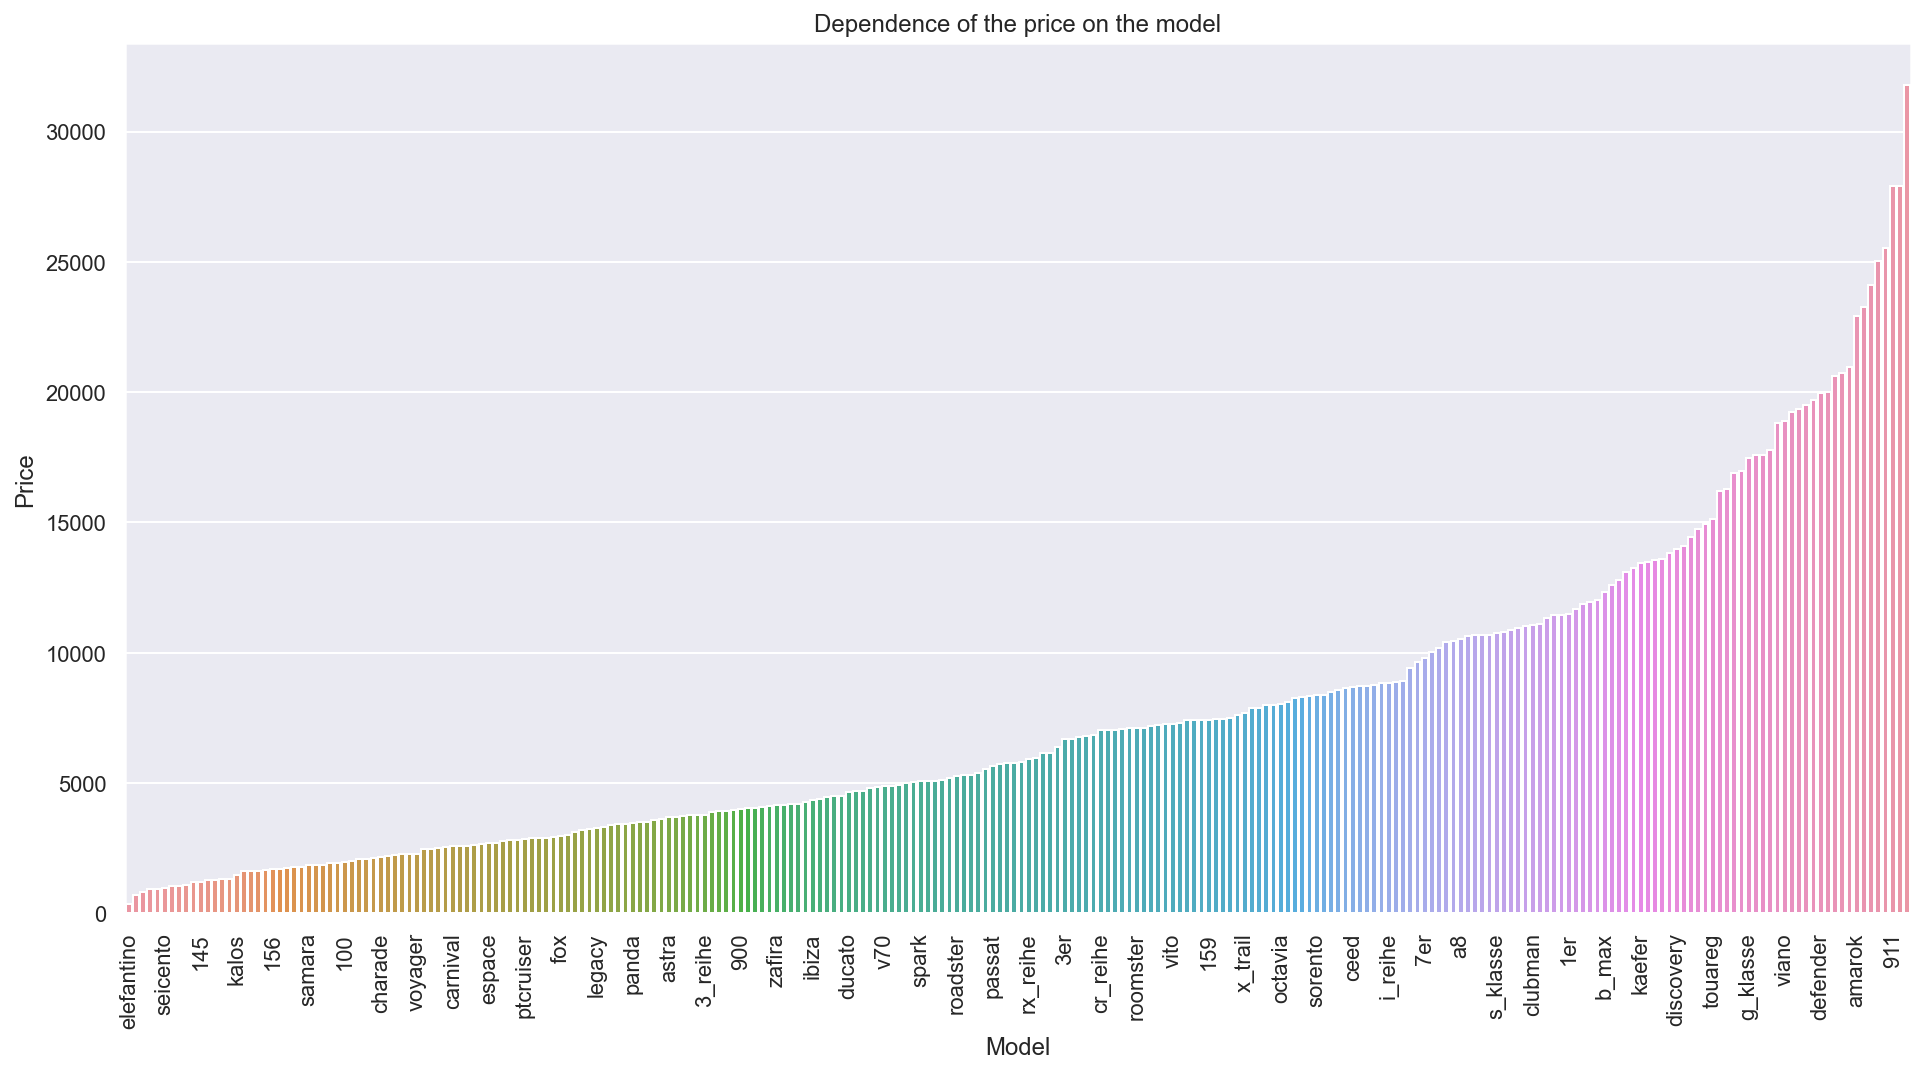

In [20]:
plt.rcParams['figure.figsize'] = 16, 8
plt.rcParams['font.size'] = 16
sns.barplot(x='model', y='price', data=model_gb)
ticks, labels = plt.xticks()
plt.xticks(ticks[::5], labels[::5], rotation=90)
plt.xlabel("Model")
plt.ylabel("Price")
plt.title('Dependence of the price on the model')
plt.show()

Что имеем: моделей очень много, но можно четко отсделить, что какие-то модели машин в целом дороже, а какие-то в целом дешевле

Теперь посмотрим на бренды: на графике ниже очень хорошо видно, что цены в среднем по брендам различаются, то есть бренд довольно значительно будет влиять на стоимость автомобиля

In [21]:
brand_gb = pd.DataFrame(data.groupby('brand')['price'].mean()).reset_index().sort_values(by='price')

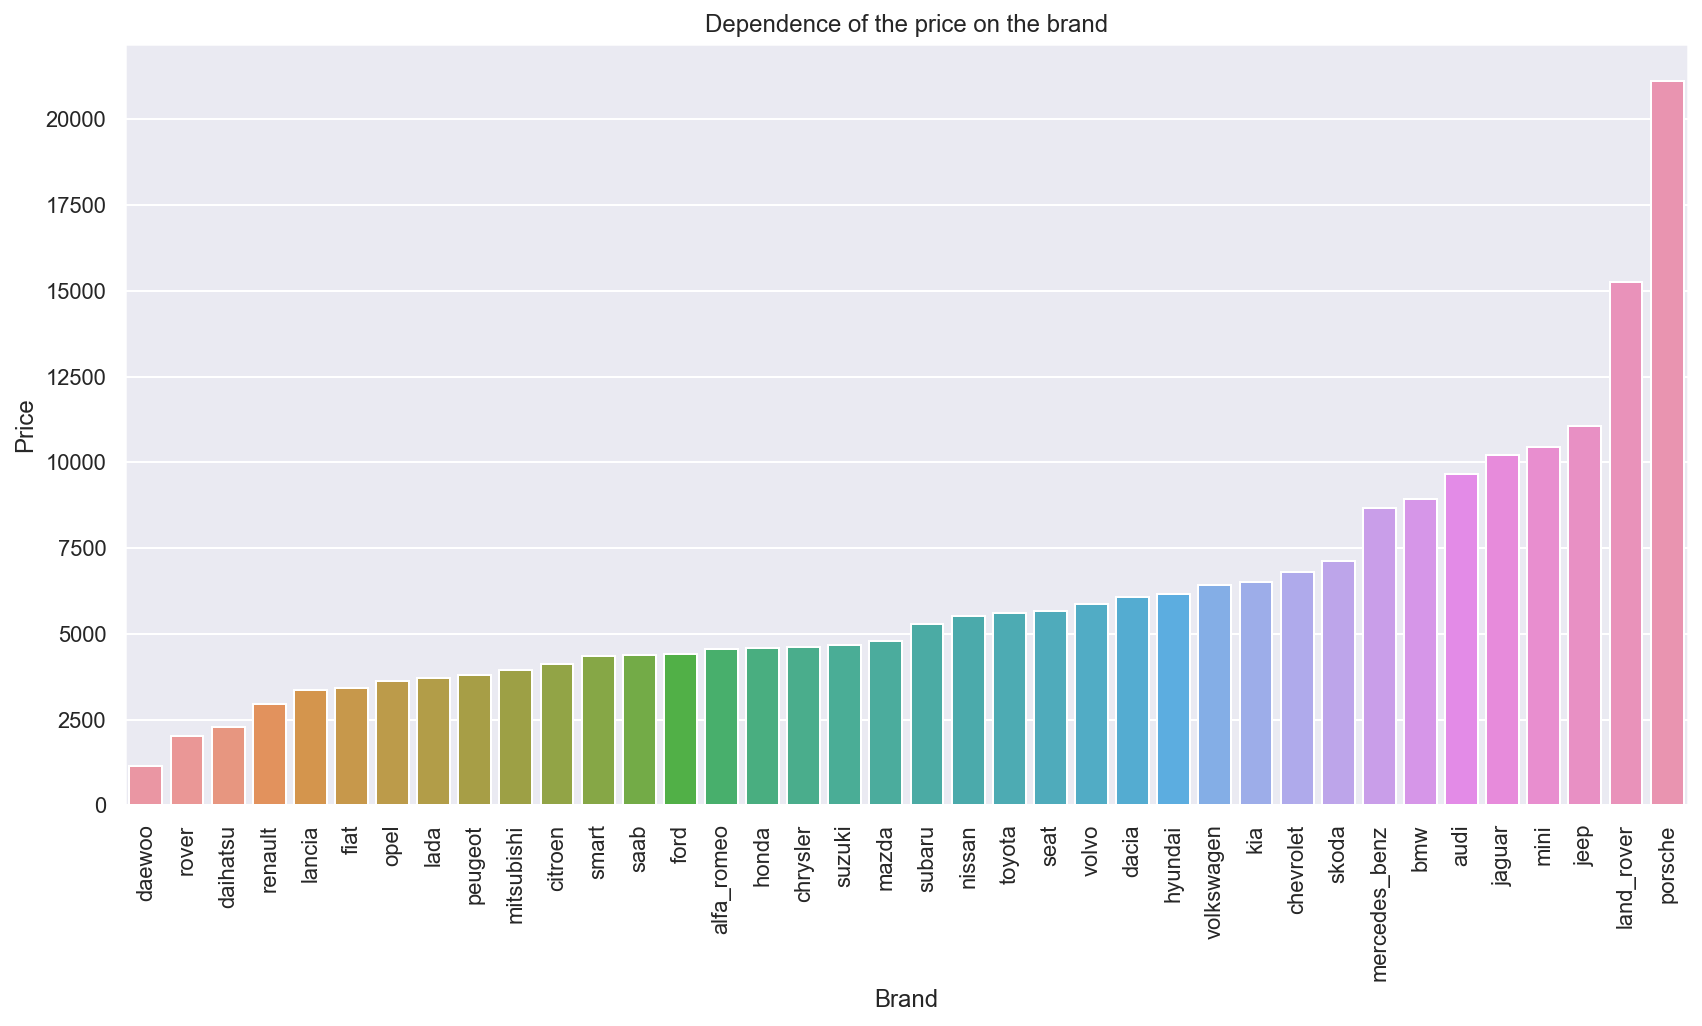

In [22]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 14
sns.barplot(x='brand', y='price', data=brand_gb)
ticks, labels = plt.xticks()
plt.xticks(ticks, labels, rotation=90)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.title('Dependence of the price on the brand')
plt.show()

Теперь рассмотрим оставшиеся категориальные переменные: `vehicleType`, `fuelType` и `kilometer`. От типа двигателя цена зависит достаточно сильно, а вот зависимость от типа топлива не так выражена - первые 4 типа на графике показываю примерно одинаковую среднюю цену, только с небольшими погрешностями. Зависимость от пробега тоже достаточно явная: на маленьком пробеге стоимость маленькая, на следующем значении она достигает максимума, а потом постепенно убывает с увеличением пробега.

In [23]:
vehicleType_gb = pd.DataFrame(data.groupby('vehicleType')['price'].mean()).reset_index().sort_values(by='price')
fuelType_gb = pd.DataFrame(data.groupby('fuelType')['price'].mean()).reset_index().sort_values(by='price')
kilometer_gb = pd.DataFrame(data.groupby('kilometer')['price'].mean()).reset_index().sort_values(by='price')

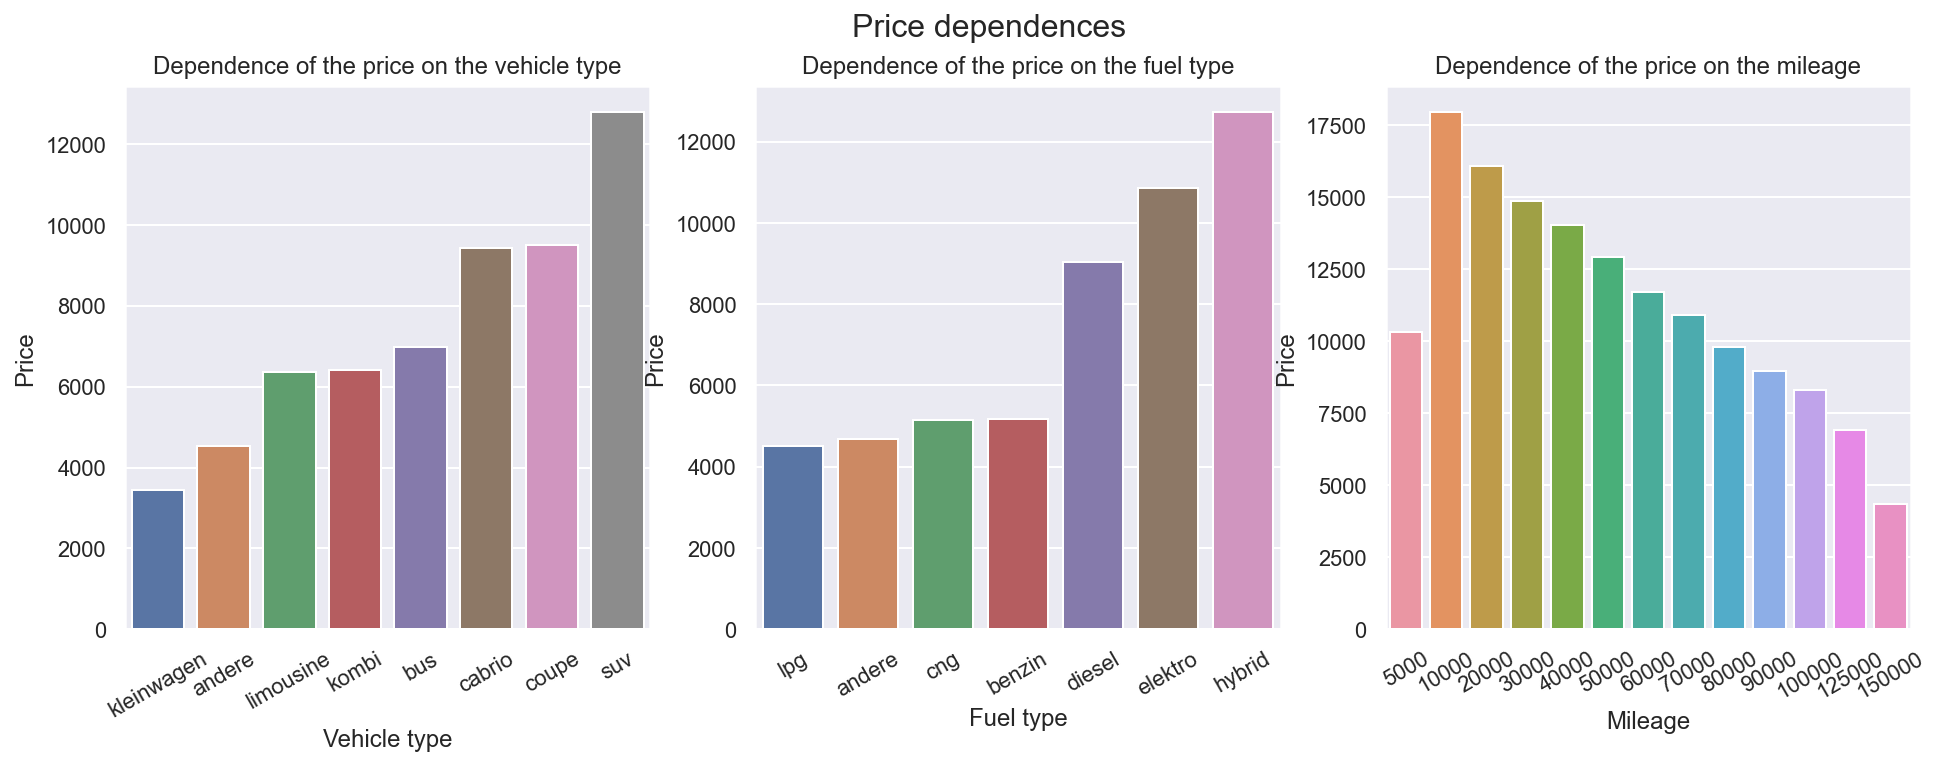

In [24]:
plt.rcParams['font.size'] = 16

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Price dependences', fontsize=16)

sns.barplot(x='vehicleType', y='price', data=vehicleType_gb, ax=axs[0])
axs[0].tick_params(axis='x', rotation=30)
axs[0].set_xlabel('Vehicle type')
axs[0].set_ylabel("Price")
axs[0].title.set_text('Dependence of the price on the vehicle type')

sns.barplot(x='fuelType', y='price', data=fuelType_gb, ax=axs[1])
axs[1].tick_params(axis='x', rotation=30)
axs[1].set_xlabel('Fuel type')
axs[1].set_ylabel("Price")
axs[1].title.set_text('Dependence of the price on the fuel type')

sns.barplot(x='kilometer', y='price', data=kilometer_gb, ax=axs[2])
axs[2].tick_params(axis='x', rotation=30)
axs[2].set_xlabel('Mileage')
axs[2].set_ylabel("Price")
axs[2].title.set_text('Dependence of the price on the mileage')

plt.show()

Теперь посмотрим на два признака, которые принимают всего 2 значения: `gearbox` и `notRepairedDamage`. Зависимость так же, как и в предыдущих случая, достаточно ясная, то есть целевая переменная скорее всего зависит от данных признаков.

In [25]:
gearbox_gb = pd.DataFrame(data.groupby('gearbox')['price'].mean()).reset_index().sort_values(by='price')
notRepairedDamage_gb = pd.DataFrame(data.groupby('notRepairedDamage')['price'].mean()).reset_index().sort_values(by='price')

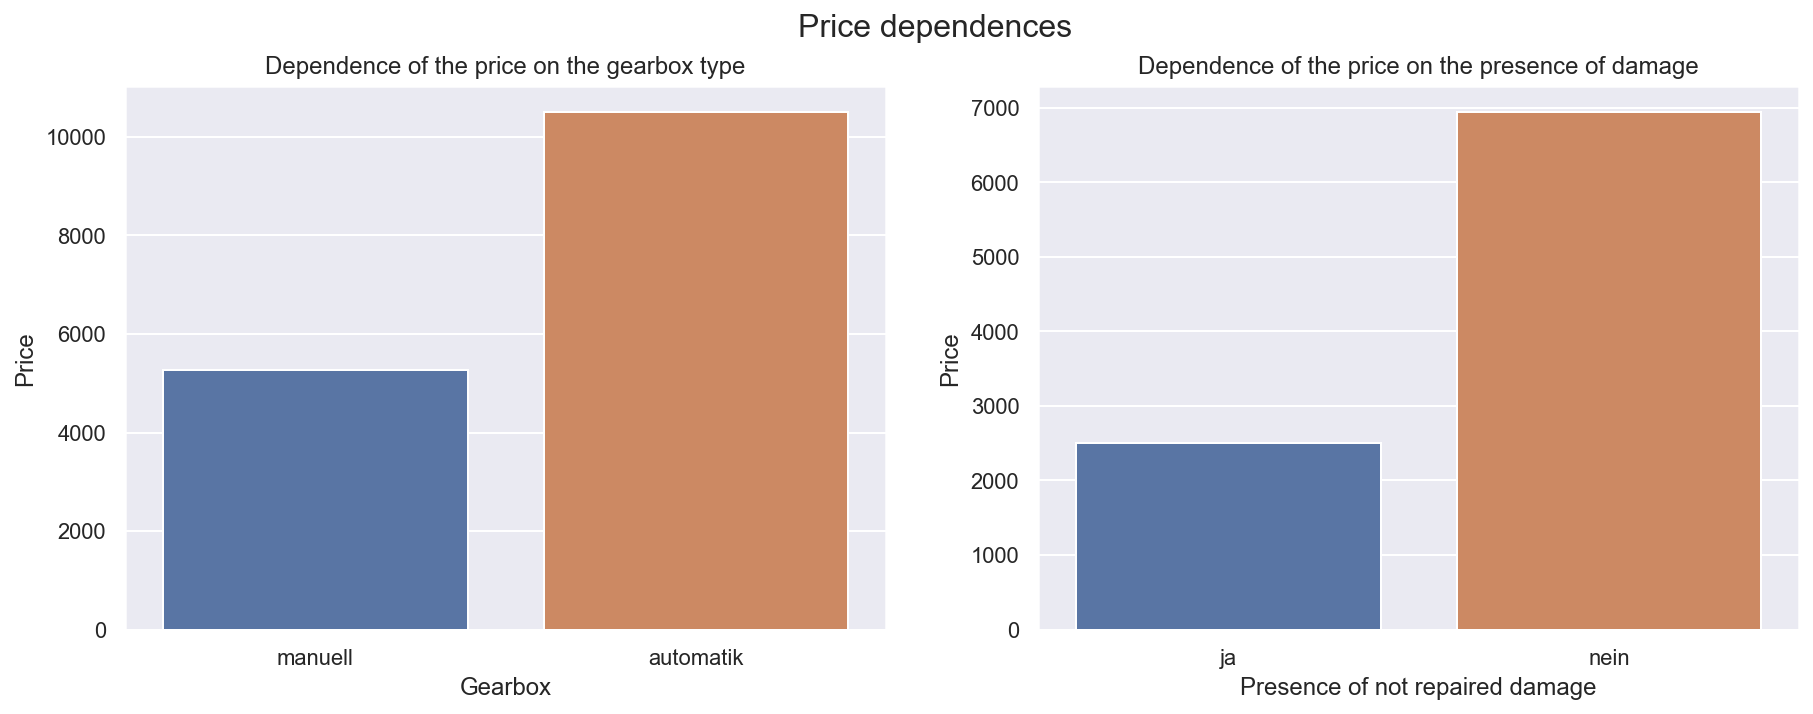

In [26]:
plt.rcParams['font.size'] = 16

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Price dependences', fontsize=16)

sns.barplot(x='gearbox', y='price', data=gearbox_gb, ax=axs[0])
axs[0].set_xlabel('Gearbox')
axs[0].set_ylabel("Price")
axs[0].title.set_text('Dependence of the price on the gearbox type')

sns.barplot(x='notRepairedDamage', y='price', data=notRepairedDamage_gb, ax=axs[1])
axs[1].set_xlabel('Presence of not repaired damage')
axs[1].set_ylabel("Price")
axs[1].title.set_text('Dependence of the price on the presence of damage')

plt.show()

Осталость только посмотреть на вещественные признаки: `powerPS`, `kilometer`, `autoAgeMonths`. Для этого так же построим графики:

In [27]:
powerPS_gb = pd.DataFrame(data.groupby('powerPS')['price'].mean()).reset_index().sort_values(by='price')
autoAgeMonths_gb = pd.DataFrame(data.groupby('autoAgeMonths')['price'].mean()).reset_index().sort_values(by='price')

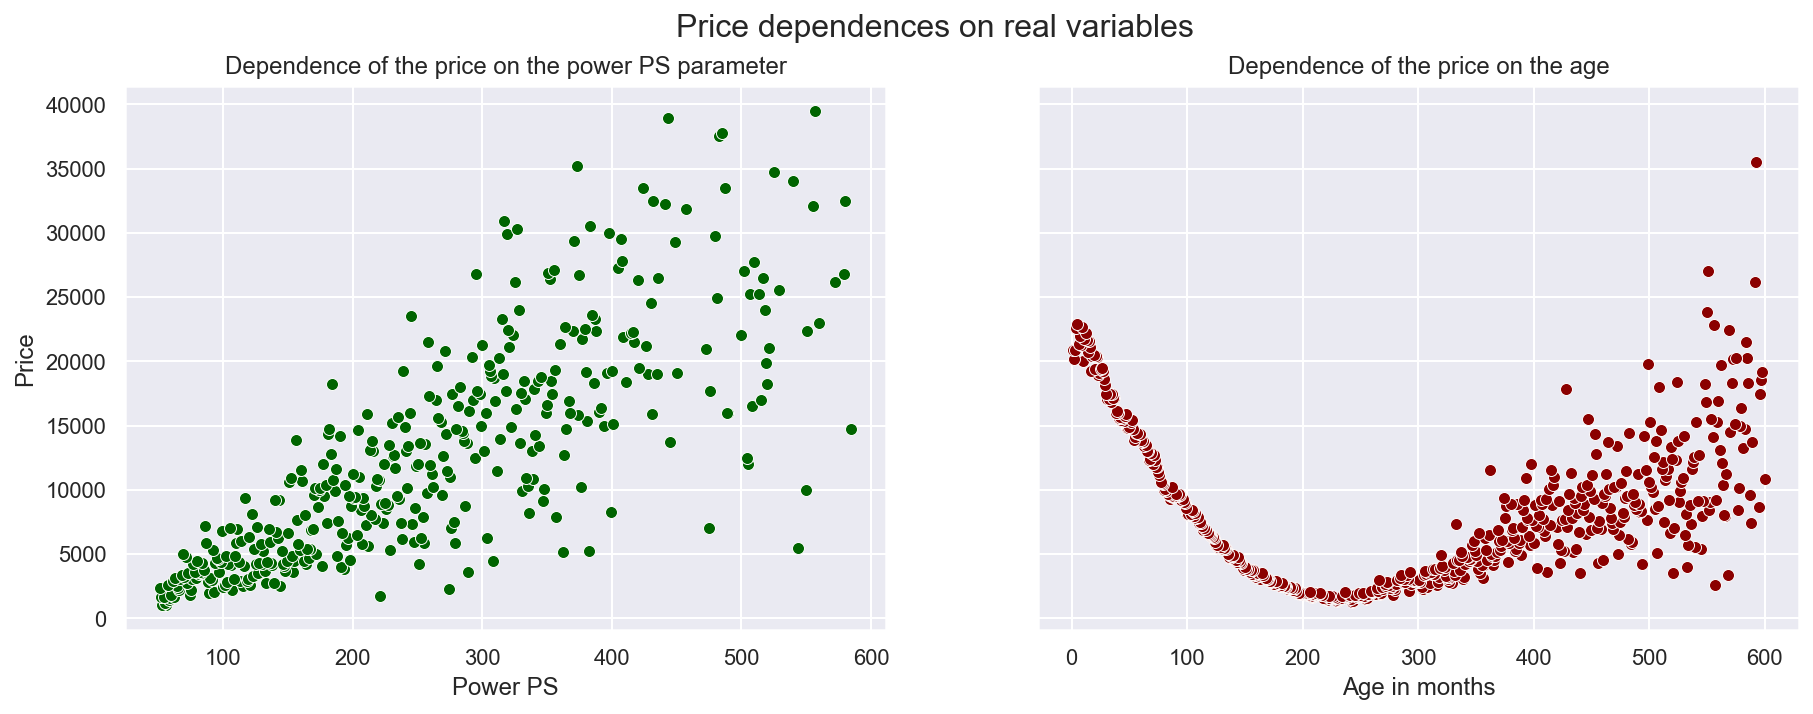

In [28]:
plt.rcParams['font.size'] = 16

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Price dependences on real variables', fontsize=16)

sns.scatterplot(x='powerPS', y='price', data=powerPS_gb, ax=axs[0], color='darkgreen')
axs[0].set_xlabel('Power PS')
axs[0].set_ylabel("Price")
axs[0].title.set_text('Dependence of the price on the power PS parameter')

sns.scatterplot(x='autoAgeMonths', y='price', data=autoAgeMonths_gb, ax=axs[1], color='darkred')
axs[1].set_xlabel('Age in months')
axs[1].set_ylabel("Price")
axs[1].title.set_text('Dependence of the price on the age')

plt.show()

Глядя на графики, получаем, что цена имеет линейную зависимость с мощностью автомобиля, хотя и не такую выраженную на больших значениях мощности. Хотя возраст авто имеет более выраженную зависимость с ценой, она не является линейной - от 0 до 250 месяцев стоимость постепенно убывает, после чего начинает расти. На больших значениях данного признака зависимость так же становится мене выраженной.

In [29]:
# корреляция таргета с вещественными признаками
data[numeric].apply(lambda x: x.corr(data['price']))

powerPS          0.564663
autoAgeMonths   -0.572088
dtype: float64

In [30]:
# корреляция логарифма таргета с вещественными признаками
data[numeric].apply(lambda x: x.corr(data['log_price']))

powerPS          0.518427
autoAgeMonths   -0.636646
dtype: float64

По наблюдениям выше можно заметить, что при логарифмировании таргета его антикорреляция в признаком возраста автомобиля становится более выраженной, а вот с линейным признаком мощности практически не изменяется. Да и в целом, глядя на не вещественные признаки, можно сделать вывод, что зависимости цены от них чаще бывают нелинейными, а значит, введение логарифма скорее всего хорошее решение.

**Пункт 3**. Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [31]:
x = data[categorical + numeric + other]
# обучаться будем на логарифм цены
y = data['log_price']

x['bias'] = 1
other += ['bias']

/var/folders/ww/w2n2kpsd3rvbzkdllh6lw9pw0000gr/T/ipykernel_3533/3965787388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['bias'] = 1


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# обработку null можно убрать, тк пропусков в данных нет
# заменим обработку пропусков на защиту от размножения бинарных признаков
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='if_binary'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [33]:
# data split into train/val/test:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=100500)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=1/9, random_state=100501)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

1. Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. 
2. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [34]:
X_train = X_train.toarray()
X_test = X_test.toarray()
X_val = X_val.toarray()

In [35]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [36]:
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm

**Пункт 1.** Сначала подберем подходящую длину шага для каждого метода с точки зрения ошибки на валидационной выборке. Для этого проведем поиск по логарифмической сетке (переберем 20 значений `lr` для каждого метода GD - от `1e-4` до `1e-1`) и выберем такое значение, которое будет выбавать минимальную ошибку. Также будем отслеживать, как вообще себя ведут ошибки на треине и на тесте для разных значений `lr`.

In [37]:
lrs = np.logspace(-4, -1, 20, base=10)

In [38]:
def plot(lrs, train, val, GD):
    plt.rcParams['figure.figsize'] = 10, 7
    plt.rcParams['font.size'] = 12
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
    fig.suptitle(f'Descent: {GD}', fontsize=16)

    axs[0].plot(lrs, train, 'r')
    axs[0].set_xlabel('Learning rate')
    axs[0].set_ylabel("Train loss")
    axs[0].title.set_text('Dependence of the train loss on the learning rate')

    axs[1].plot(lrs, val, 'b')
    axs[1].set_xlabel('Learning rate')
    axs[1].set_ylabel("Validation loss")
    axs[1].title.set_text('Dependence of the validation loss on the learning rate')
    
    plt.show()

Descent: stochastic


  0%|          | 0/20 [00:00<?, ?it/s]

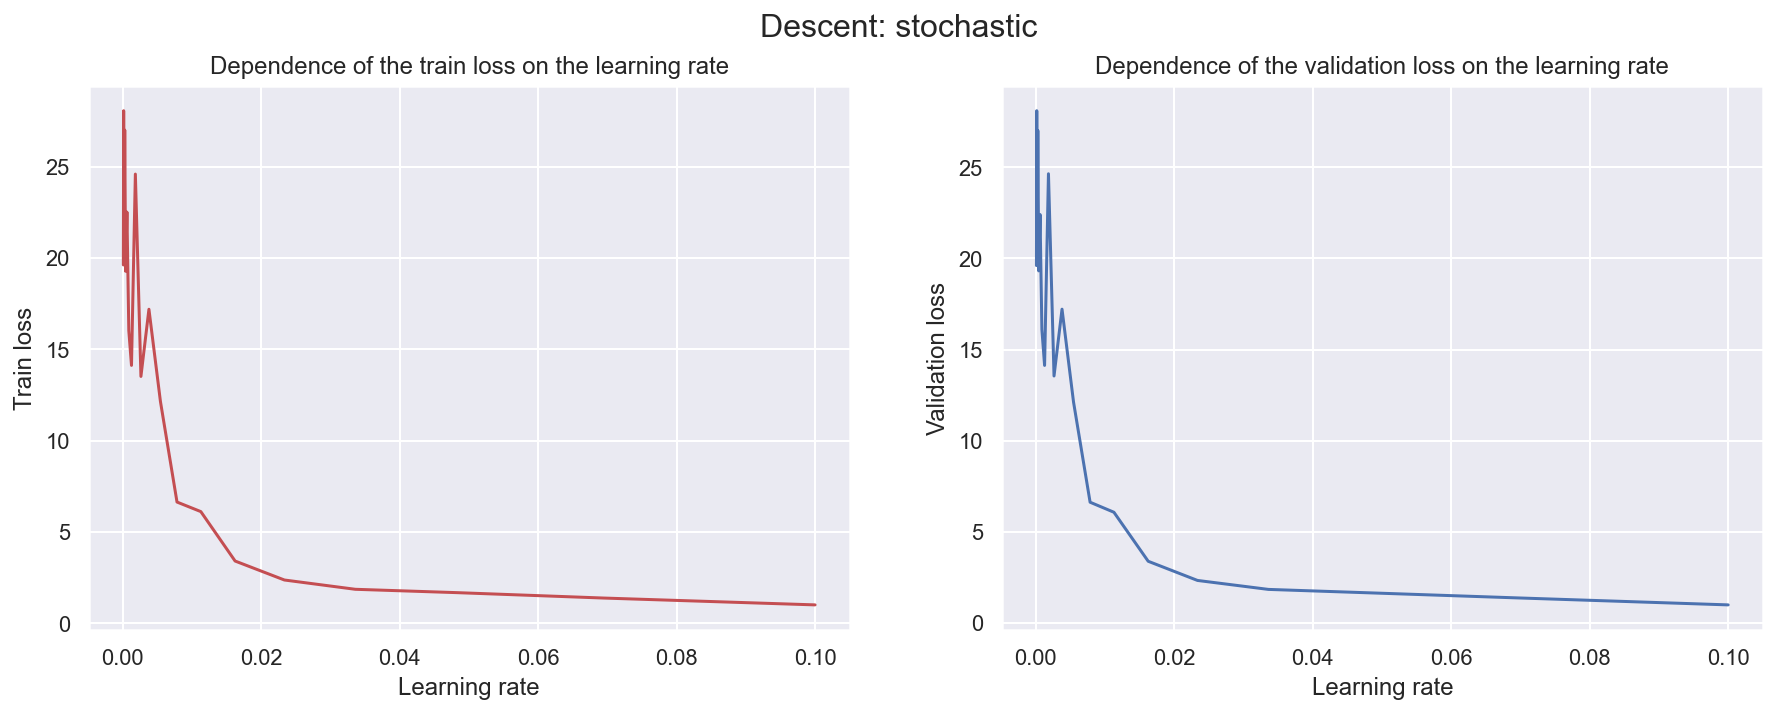

Descent: full


  0%|          | 0/20 [00:00<?, ?it/s]

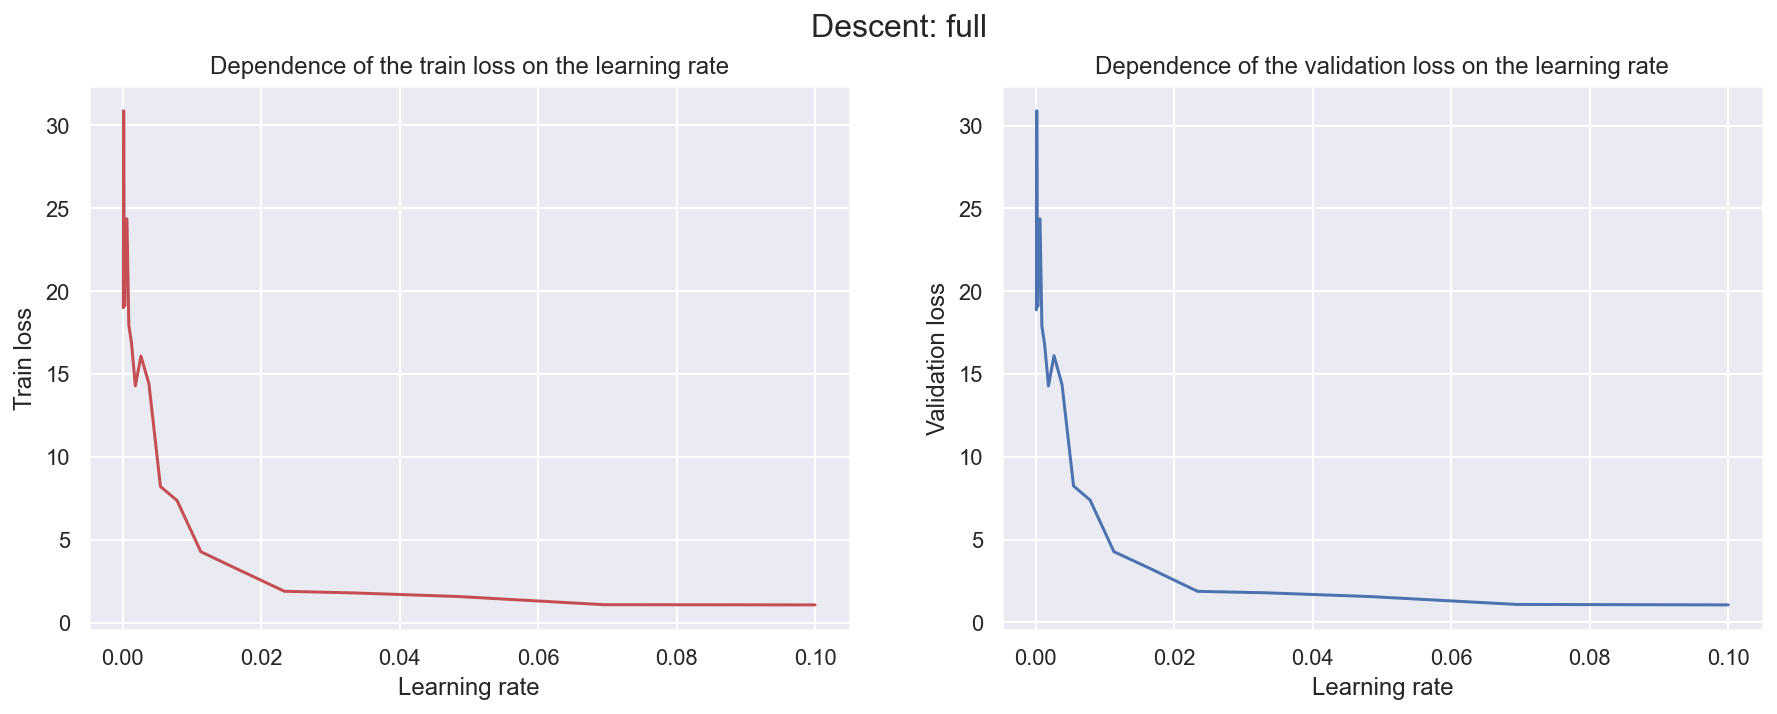

Descent: momentum


  0%|          | 0/20 [00:00<?, ?it/s]

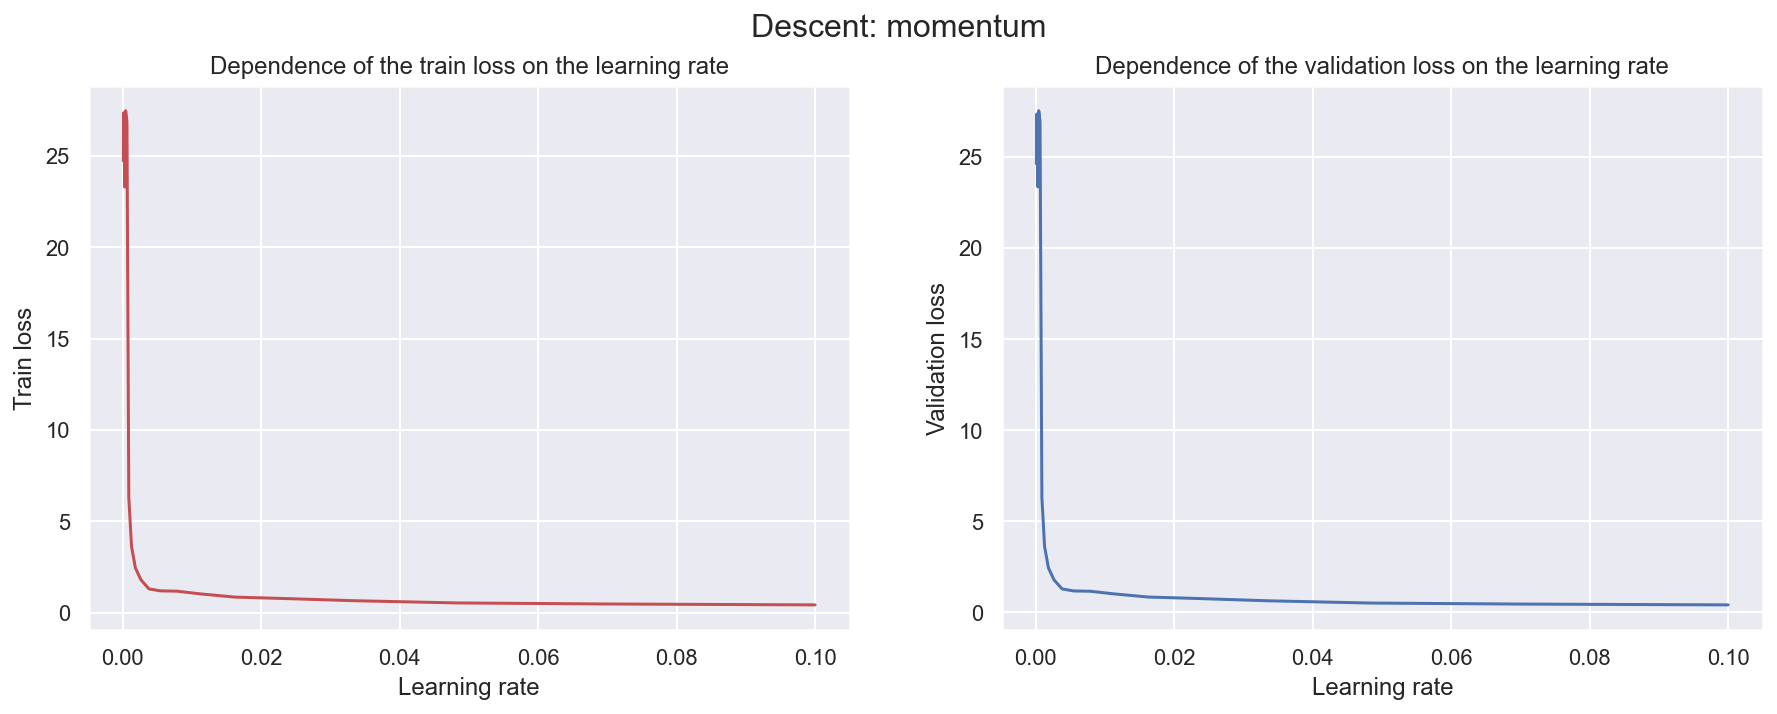

Descent: adam


  0%|          | 0/20 [00:00<?, ?it/s]

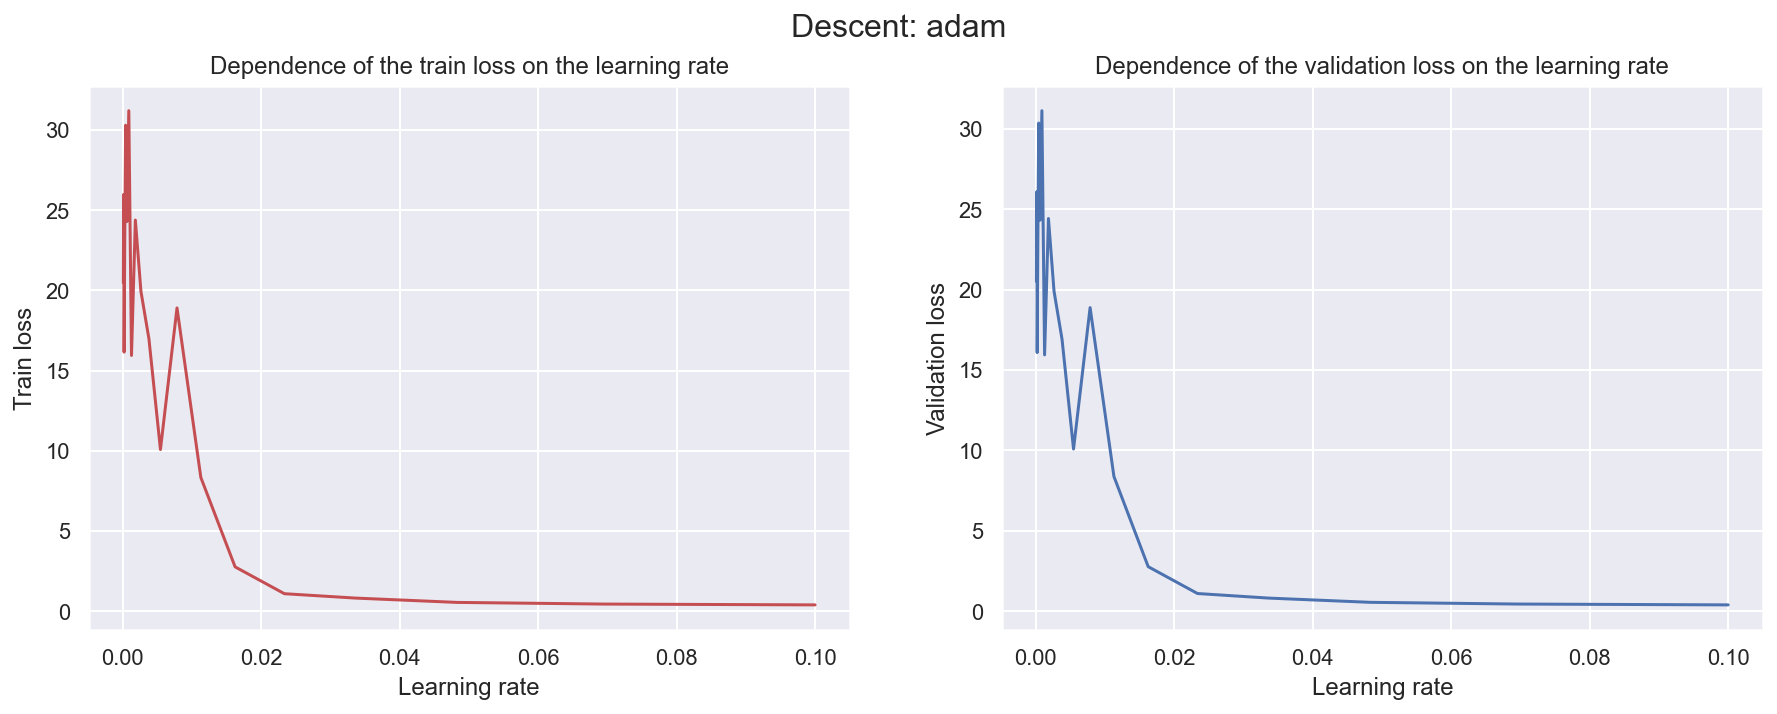

In [39]:
dimension = X_train.shape[1]

# словарь, в который будем записывать длину шага с минимальной ошибкой на валидационной выборке
best_lr = dict()

for descent in ['stochastic', 'full', 'momentum', 'adam']:
    val_losses = []
    train_losses = []
    print(f'Descent: {descent}')
    for lr in tqdm(lrs):
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': dimension,
                'lambda_': lr
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        val_losses.append(regression.calc_loss(X_val, y_val))
        train_losses.append(regression.loss_history[-1])
        
        if val_losses[-1] == min(val_losses):
            best_lr[descent] = lr
            
    plot(lrs, train_losses, val_losses, descent)

In [40]:
best_lr

{'stochastic': 0.1, 'full': 0.1, 'momentum': 0.1, 'adam': 0.1}

**Пункт 2.** Для каждого метода посчитаем ошибку на обучающей и тестовой выборках, а также качество по метрике $R^2$, и сохраним количество итераций до сходимости. Для этого будем использовать дефолтные параметры, `lr` утановим такой, какой нашли в предыдущем пункте, а `max_iter` установим очень большим, чтобы спуск заканчивался за счет сходимости.

Количество итераций до сходимости - это `len(regression.loss_history) - 1`

In [41]:
grad_train_loss = dict()
grad_test_loss = dict()
grad_max_iter = dict()
grad_r2 = dict()

for descent in ['stochastic', 'full', 'momentum', 'adam']:
    descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': dimension,
            'lambda_': best_lr[descent]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
        max_iter = 100500
    )

    regression.fit(X_train, y_train)
    grad_train_loss[descent] = regression.calc_loss(X_train, y_train)
    grad_test_loss[descent] = regression.calc_loss(X_test, y_test)
    grad_max_iter[descent] = len(regression.loss_history) - 1
    grad_r2[descent] = r2_score(y_test, regression.predict(X_test))
    print(f'GD: {descent} - done')

GD: stochastic - done
GD: full - done
GD: momentum - done
GD: adam - done


In [42]:
def get_vals(d):
    return list(d.values())

In [43]:
gd_stats = np.array([get_vals(grad_train_loss), 
                     get_vals(grad_test_loss),
                     get_vals(grad_r2),
                     get_vals(grad_max_iter)]).T

In [44]:
gd_stats = pd.DataFrame(gd_stats,
                        index=list(grad_train_loss.keys()),
                        columns=['train_loss', 'test_loss', 'test_r2', 'iter_required'])
gd_stats['iter_required'] = gd_stats['iter_required'].astype(int)
gd_stats = gd_stats.round({'train_loss': 2, 'test_loss': 2, 'test_r2': 2})
gd_stats

,train_loss,test_loss,test_r2,iter_required
stochastic,1.03,1.03,0.19,53
full,1.15,1.15,0.10,33
momentum,0.42,0.41,0.68,83
adam,0.41,0.41,0.68,303


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.


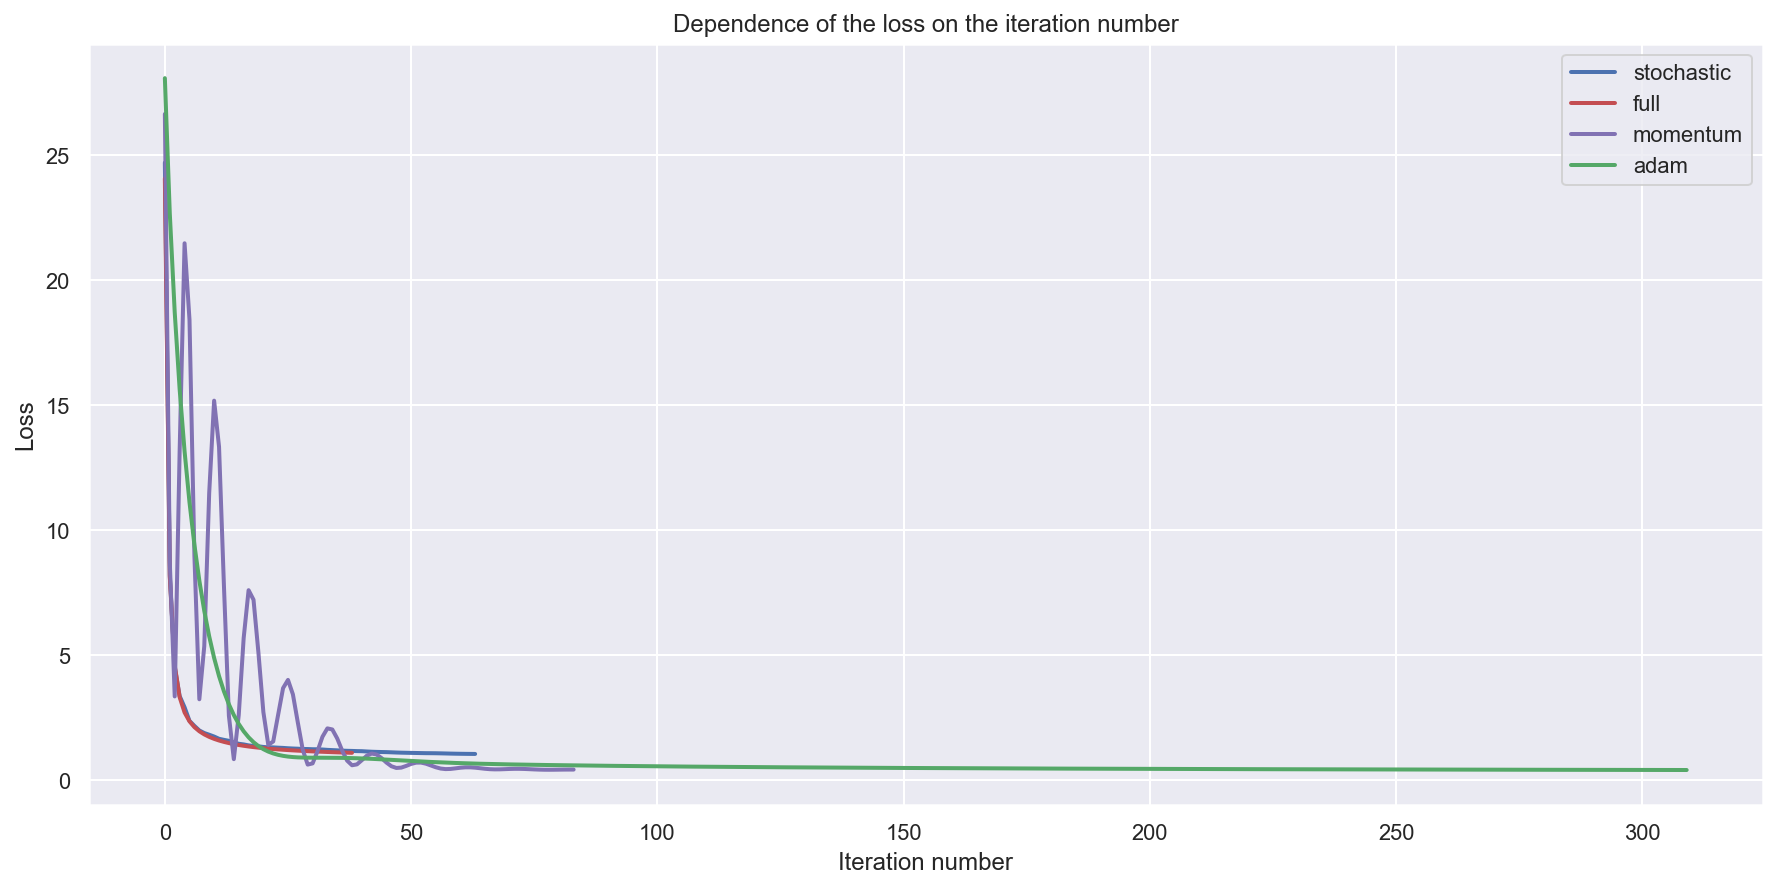

In [45]:
i = 0
colors = ['b', 'r', 'm', 'g']
plt.rcParams['figure.figsize'] = 15, 7
for descent in ['stochastic', 'full', 'momentum', 'adam']:
    descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': dimension,
            'lambda_': best_lr[descent]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
        max_iter = 100500
    )
    
    regression.fit(X_train, y_train)
    iters = np.arange(0, len(regression.loss_history), 1)
    plt.plot(iters, regression.loss_history, label=descent, color=colors[i], linewidth=2)
    i += 1

plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.title('Dependence of the loss on the iteration number')
plt.legend()
plt.show()

**Метрики:** 
1. *Сравнение ошибок на тесте и трейне* - ошибка на тренировочной и на тестовой выборке после обучения модели примерно одинаковая для всех методов градиентного спуска, а если она отличается, то не более, чем на 0.01. При этом не всегда финальная ошибка на тестовой выборке меньше, чем на тренировочной - у методов `momentum` и `adam` ошибка на тренировочной выборке, наоборот, выше.
2. *Сравнение ошибок между методами* - лучший результат с точки зрения ошибки показал `Adam` - финальная ошибка не превышает 0.41. На втором месте идет `Momentum` с ошибкой не выше 0.42. На третьем месте по показателю `loss` оказывается стохастический градиентный спуск - его ошибка более, чем в 2 раза превышает ошибку после обучения методом `Momentum`. Последнее место в данном списке занимает полный градиентный спуск с самой высокой финальной ошибкой - 1.16.
3. *Метрика $R^2$* - лучшие результаты по данной метрике показывают два самых сложный метода - `Adam` и `Momentum` - значение метрики 0.68 и 0.67 соответственно. На втором месте оказывается `SGD` с результатом в 0.17, а последнее место занимает полный градиентный спуск. 
4. *Вывод* - можно однозначно сделать следующий вывод: по всем параметрам лидирует метод `Adam`, второе место занимает (так же по всем параметрам) занимает `Momentum`, достаточно сильно от него отстает `SGD` и худший результат показывает `GD`.

**Итерации:**
1. `Adam` - данному методу понадобилось наибольшее количество итераций, чтобы достичь сходимости, причем остальным методам всегда требовалось в 4 и более раз меньше итераций! Ошибка на начальном приближении у данного метода не самая высокая, а зависимость ошибки от номера итерации достаточно "гладкая": на значениях от 0 до примерно 20 ошибка падает очень резко, после чего продолжает медленно стремиться к 0.
2. `Momentum` - как и по всем остальным параметрам, данный метод занимает второе место по количеству итераций до достижения сходимости. При этом график зависимости ошибки от итерации у этого метода самый интересный - ошибка на начальном приближении самая маленькая, зато потом начинаются постепенно затухающие колебания, которые затухают практически полностью примерно к 60-й итерации. 
3. `SGD` и `GD` - графики практически идентичные, оба спуска проходят достаточно гладко, но полный градиентный спуск сходимости достигает раньше и показывает чуть лучший результат с точки зрения метрик.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [46]:
import time

In [48]:
batch_sizes = np.arange(5, 500, 10)
k = 5
iters_batch = dict()
time_batch = dict()

for batch_size in batch_sizes:
    iters_ = []
    time_ = []
    for _ in range(k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': dimension,
                'lambda_': best_lr['stochastic'],
                'batch_size': batch_size
            }
        }

        regression = LinearRegression(
            descent_config=descent_config,
            max_iter = 100500
        )

        # TODO: timer start
        start = time.time()
        regression.fit(X_train, y_train)
        # TODO: timer stop
        end = time.time()
        
        iters_.append(len(regression.loss_history) - 1)
        time_.append(end - start)
    
    iters_batch[batch_size] = np.mean(iters_)
    time_batch[batch_size] = np.mean(time_)

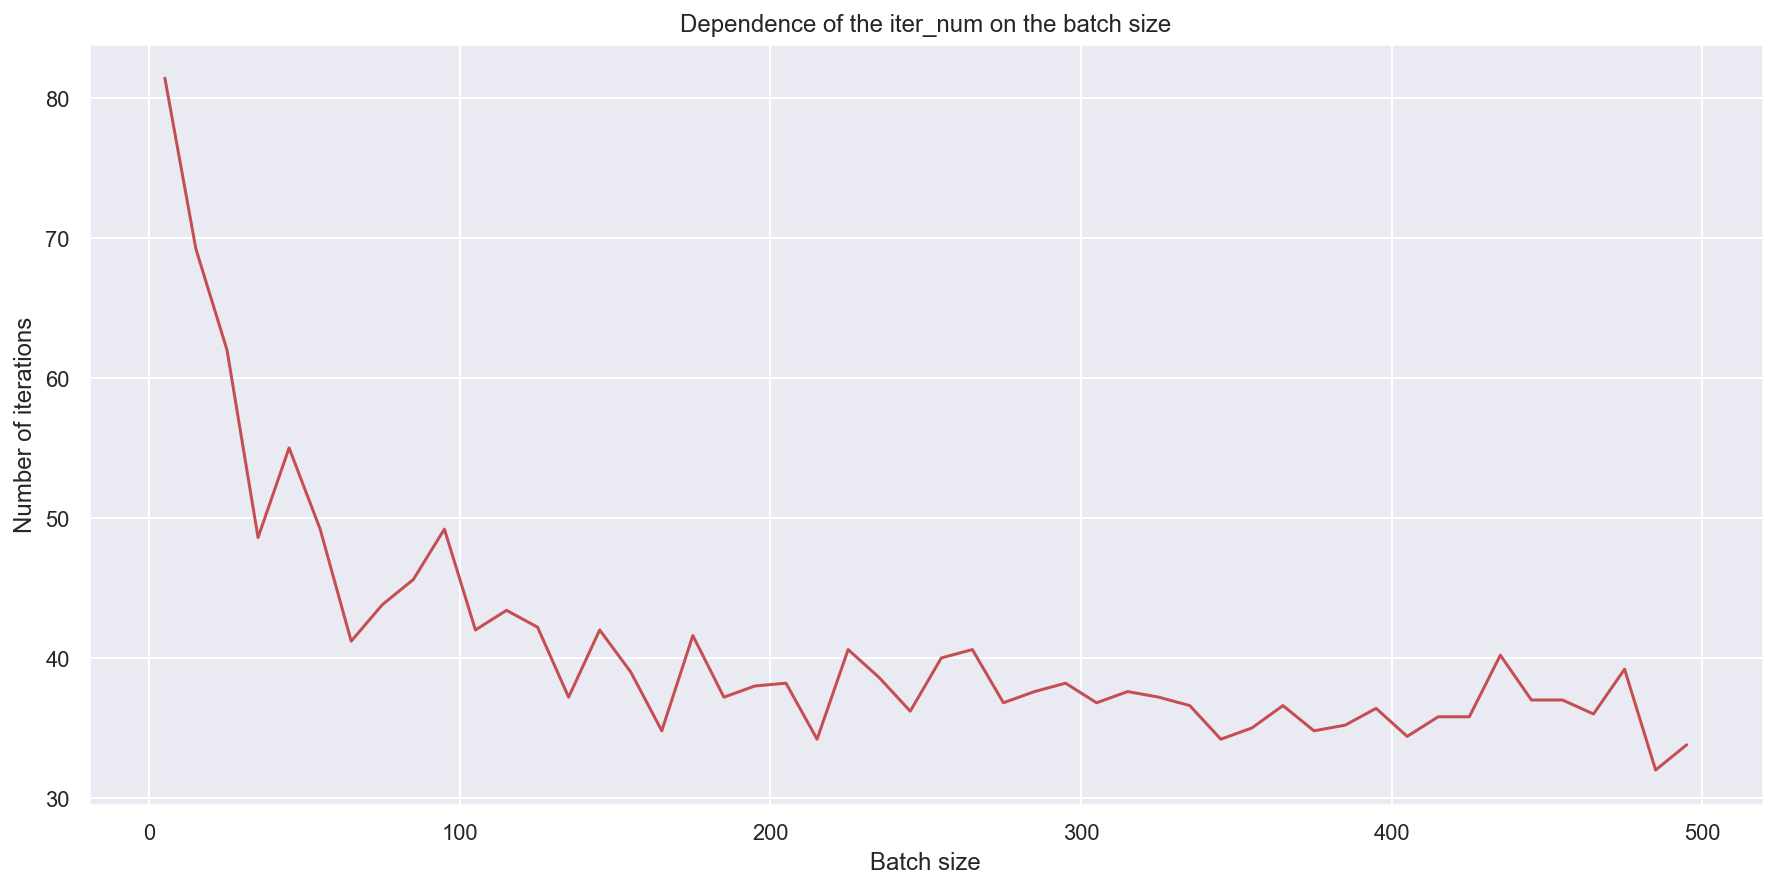

In [49]:
plt.plot(list(iters_batch.keys()), get_vals(iters_batch), 'r')
plt.xlabel("Batch size")
plt.ylabel("Number of iterations")
plt.title('Dependence of the iter_num on the batch size')
plt.show()

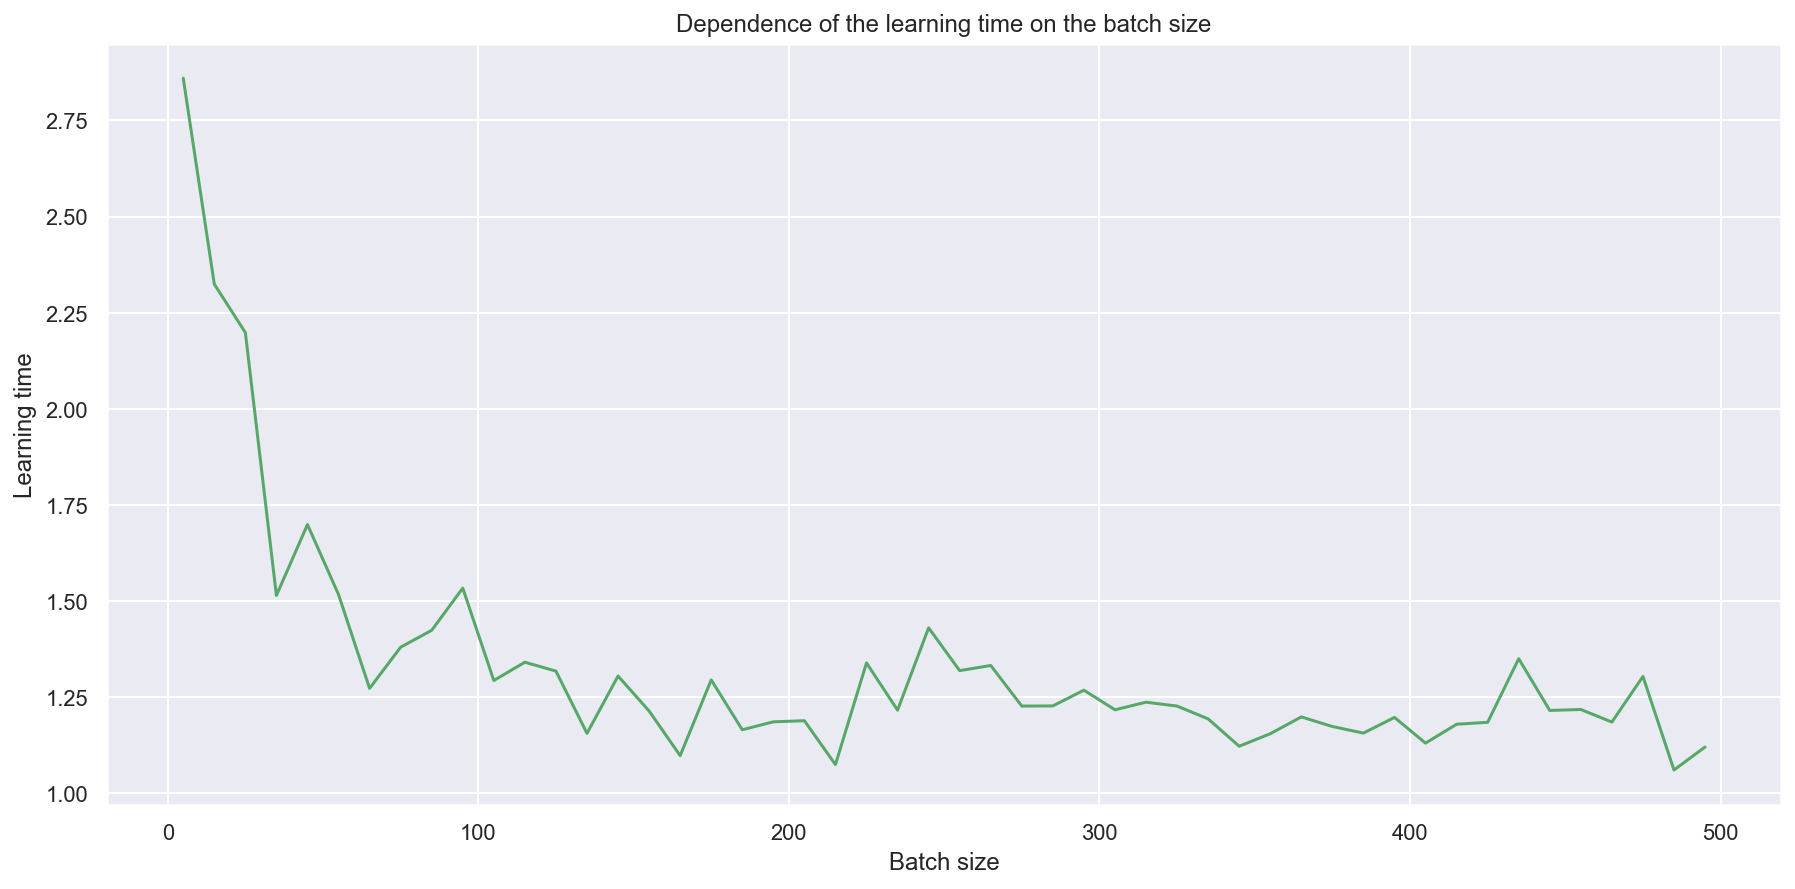

In [50]:
plt.plot(list(time_batch.keys()), get_vals(time_batch), 'g')
plt.xlabel("Batch size")
plt.ylabel("Learning time")
plt.title('Dependence of the learning time on the batch size')
plt.show()

Графики оказались очень похожими: при увеличении размера батча примерно до 30-40 объектов и время, и количество итераций убывают. Впоследствии тоже наблюдается тенденция на медленное и постепенное убывание, стабильным его назвать нельзя. Также можно сделать вывод, что время обучения напрямую зависит от количества итераций до сходимости.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: [BaseDescentReg](https://contest.yandex.ru/contest/29933/problems/F/?success=55528934#528867/2021_10_11/d2PBaMv7Cj)

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Будем подбирать лучшее сочетание $\lambda$ и $\mu$ для каждого метода градиентного спуска.

In [51]:
lrs = np.logspace(-4, -1, 10, base=10)

In [52]:
mus = np.logspace(-3, 0.5, 10, base=10)

In [53]:
dimension = X_train.shape[1]

# словарь, в который будем записывать длину шага с минимальной ошибкой на валидационной выборке
best_lr_mu = dict()

for descent in ['stochastic', 'full', 'momentum', 'adam']:
    val_losses = []
    train_losses = []
    print(f'Descent: {descent}')
    for lr in tqdm(lrs):
        for mu in mus:
            descent_config = {
                'descent_name': descent,
                'regularized': True,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': lr,
                    'mu': mu
                }
            }

            regression = LinearRegression(
                descent_config=descent_config
            )

            regression.fit(X_train, y_train)
            val_losses.append(regression.calc_loss(X_val, y_val))
            train_losses.append(regression.loss_history[-1])

            if val_losses[-1] == min(val_losses):
                best_lr_mu[descent] = [lr, mu]

Descent: stochastic


  0%|          | 0/10 [00:00<?, ?it/s]

Descent: full


  0%|          | 0/10 [00:00<?, ?it/s]

Descent: momentum


  0%|          | 0/10 [00:00<?, ?it/s]

Descent: adam


  0%|          | 0/10 [00:00<?, ?it/s]

In [54]:
best_lr_mu

{'stochastic': [0.1, 0.0879922543569107],
 'full': [0.1, 0.03593813663804628],
 'momentum': [0.1, 0.001],
 'adam': [0.1, 0.001]}

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

In [55]:
reg_train_loss = dict()
reg_test_loss = dict()
reg_max_iter = dict()
reg_r2 = dict()


get_name = lambda i, descent: f'{descent}_with_reg' if i else f'{descent}_no_reg'
for descent in ['stochastic', 'full', 'momentum', 'adam']:
    for i in range(2):
        if not i:
            descent_config = {
                'descent_name': descent,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': best_lr[descent]
                }
            }
        else:
            descent_config = {
                'descent_name': descent,
                'regularized': True,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': best_lr_mu[descent][0],
                    'mu': best_lr_mu[descent][1]
                }
            }

        regression = LinearRegression(
            descent_config=descent_config,
            max_iter = 100500
        )

        regression.fit(X_train, y_train)
        name = get_name(i, descent)
        reg_train_loss[name] = regression.calc_loss(X_train, y_train)
        reg_test_loss[name] = regression.calc_loss(X_test, y_test)
        reg_max_iter[name] = len(regression.loss_history) - 1
        reg_r2[name] = r2_score(y_test, regression.predict(X_test))
    print(f'GD: {descent} - done')

GD: stochastic - done
GD: full - done
GD: momentum - done
GD: adam - done


In [56]:
gdreg_stats = np.array([get_vals(reg_train_loss), 
                     get_vals(reg_test_loss),
                     get_vals(reg_r2),
                     get_vals(reg_max_iter)]).T

In [57]:
gdreg_stats = pd.DataFrame(gdreg_stats,
                        index=list(reg_train_loss.keys()),
                        columns=['train_loss', 'test_loss', 'test_r2', 'iter_required'])
gdreg_stats['iter_required'] = gdreg_stats['iter_required'].astype(int)
gdreg_stats = gdreg_stats.round({'train_loss': 2, 'test_loss': 2, 'test_r2': 2})
gdreg_stats

,train_loss,test_loss,test_r2,iter_required
stochastic_no_reg,1.19,1.18,0.07,38
stochastic_with_reg,1.51,1.51,-0.19,129
full_no_reg,1.15,1.14,0.10,34
full_with_reg,1.44,1.43,-0.13,55
momentum_no_reg,0.42,0.41,0.68,83
momentum_with_reg,0.51,0.50,0.61,199
adam_no_reg,0.40,0.39,0.69,302
adam_with_reg,0.62,0.60,0.53,280


Для каждого метода наличие регуляризации дало свои результаты:
1. `Adam` - с регуляризацией данный метод показывает результаты хуже, чем без нее, зато сходимость наступает почти на 90 итераций быстрее
2. `Momentum` - данный метод так же работает хуже после добавления регуляризации, чем до него, но вот сходится он почти в 2.5 раза дольше с регуляризацией 
3. `GD` - ошибка тут гораздо выше, чем на ранее описанных методах, метрика $R^2$ с регуляризацией вообще уходит в минус, а на сходимость требуется больше времени после добавления регуляризации
4. `SGD` - так же, как и в предыдущих случаях, качество тут упало по всем метрикам и сходимость наступает в 2.5 раза позже.

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

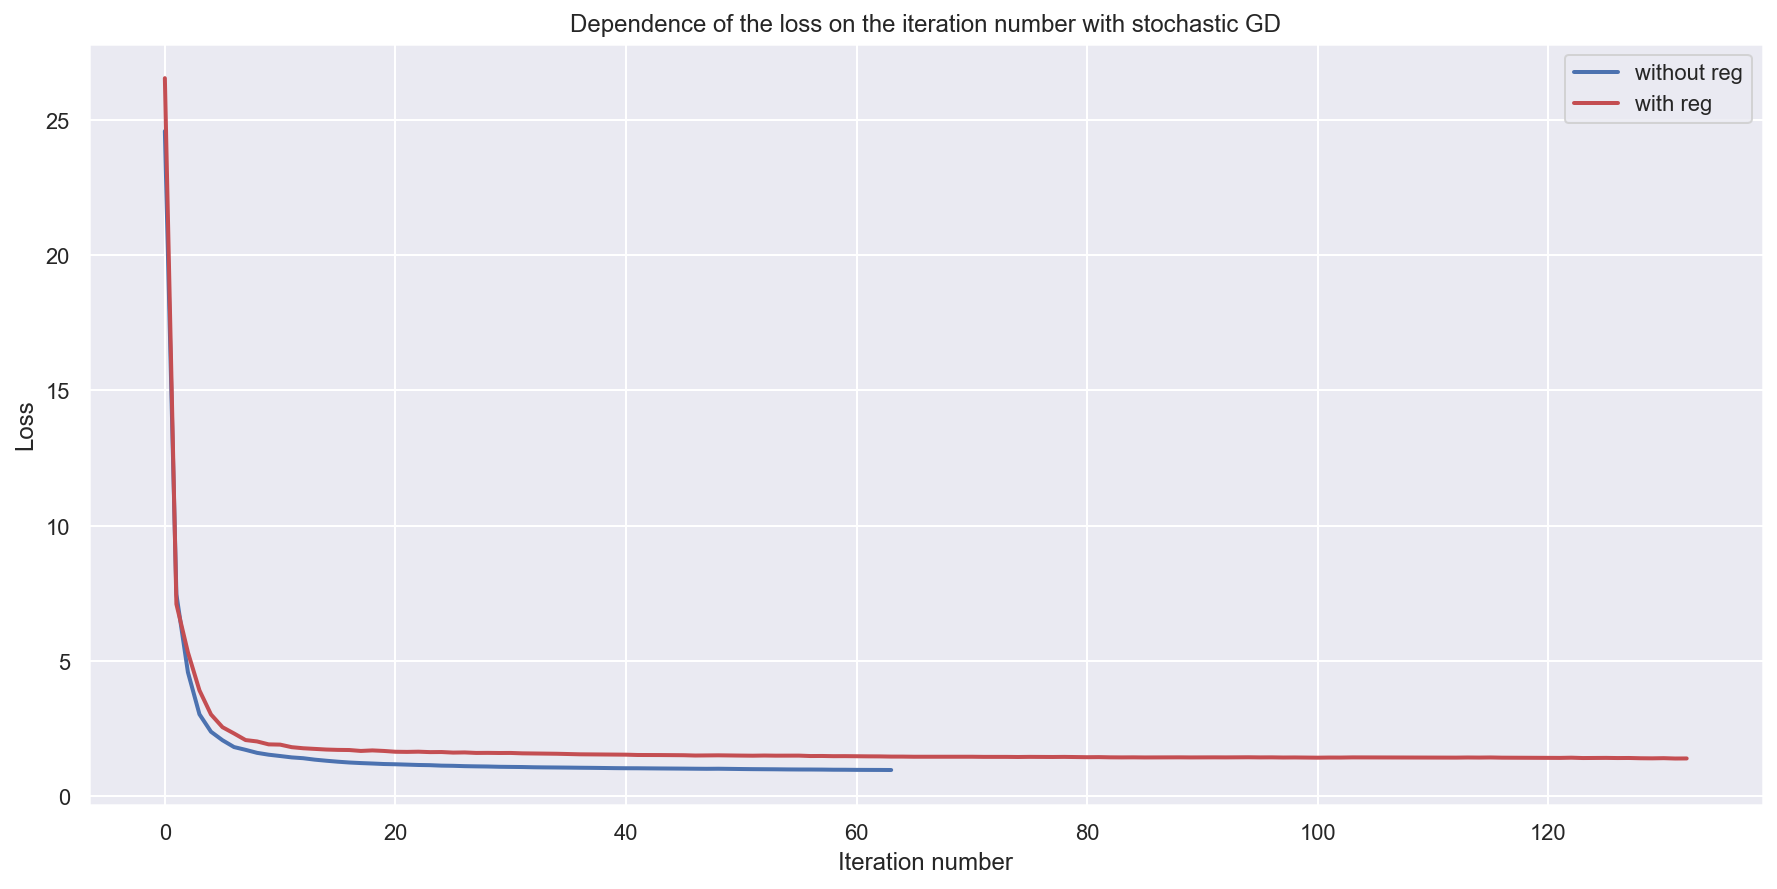

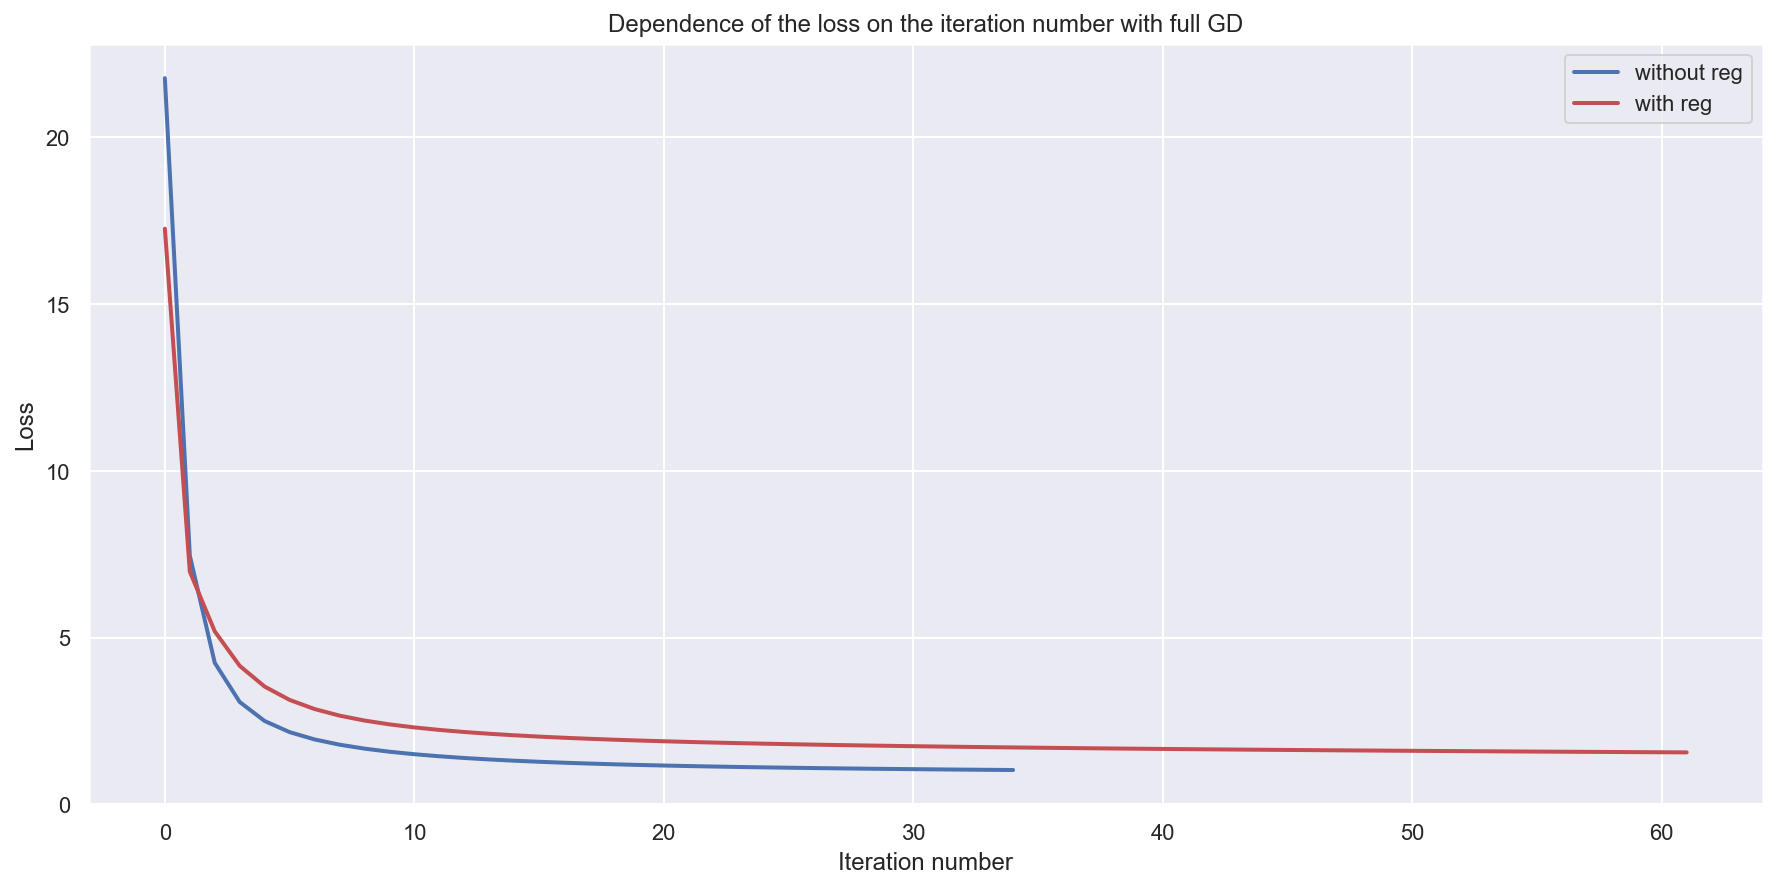

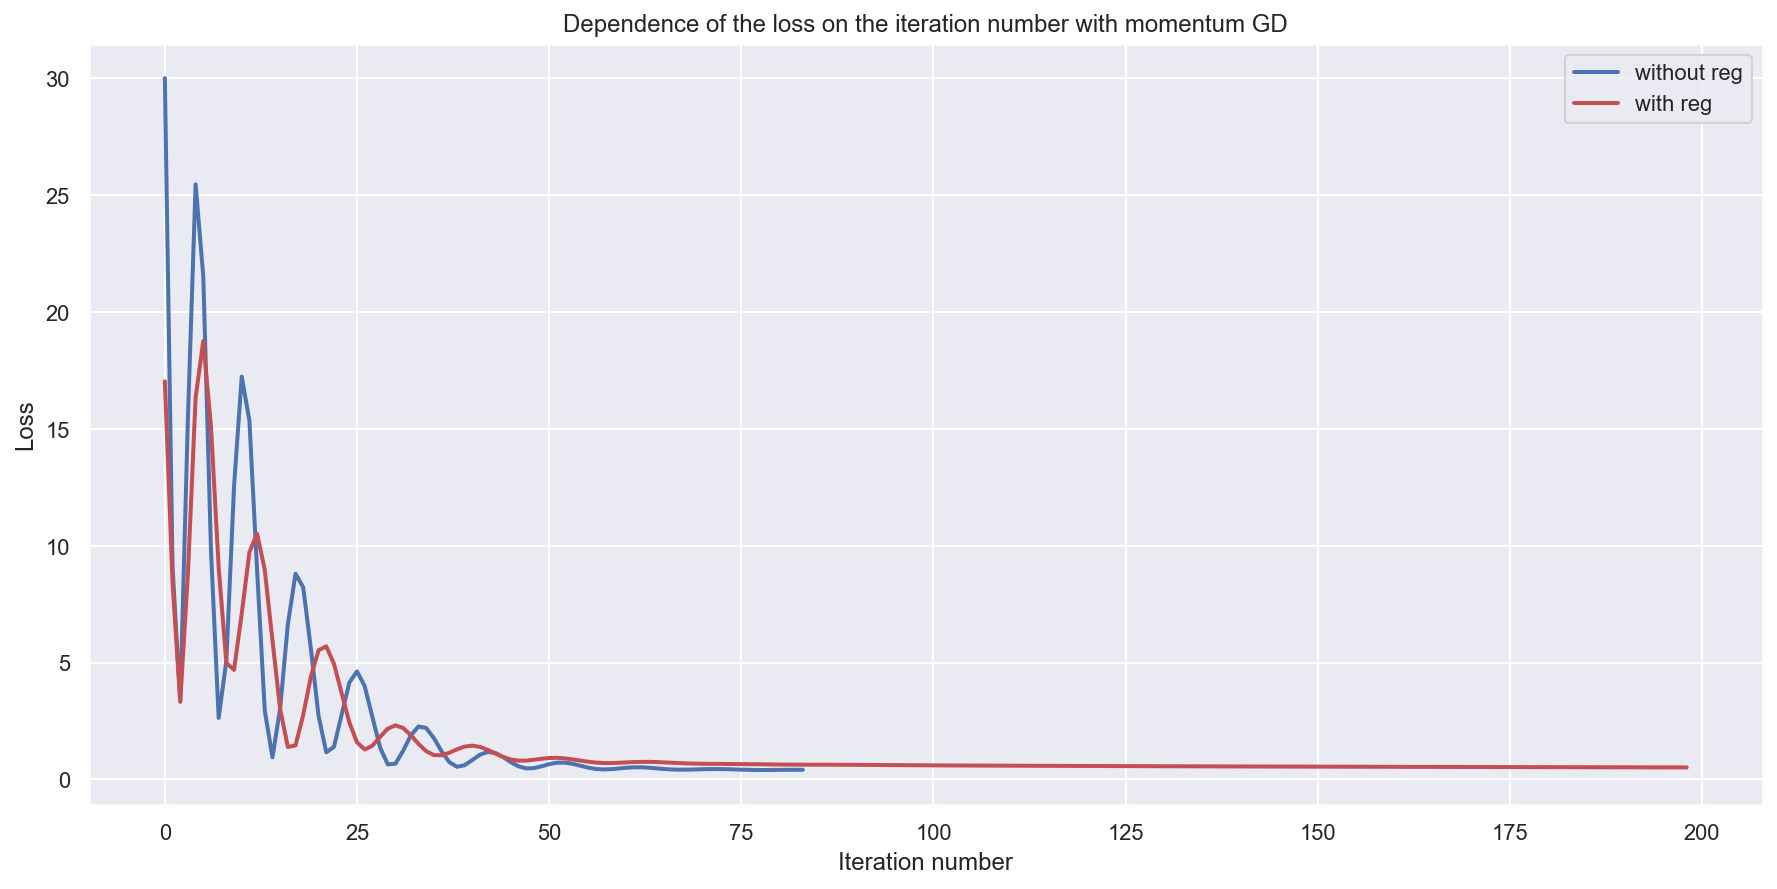

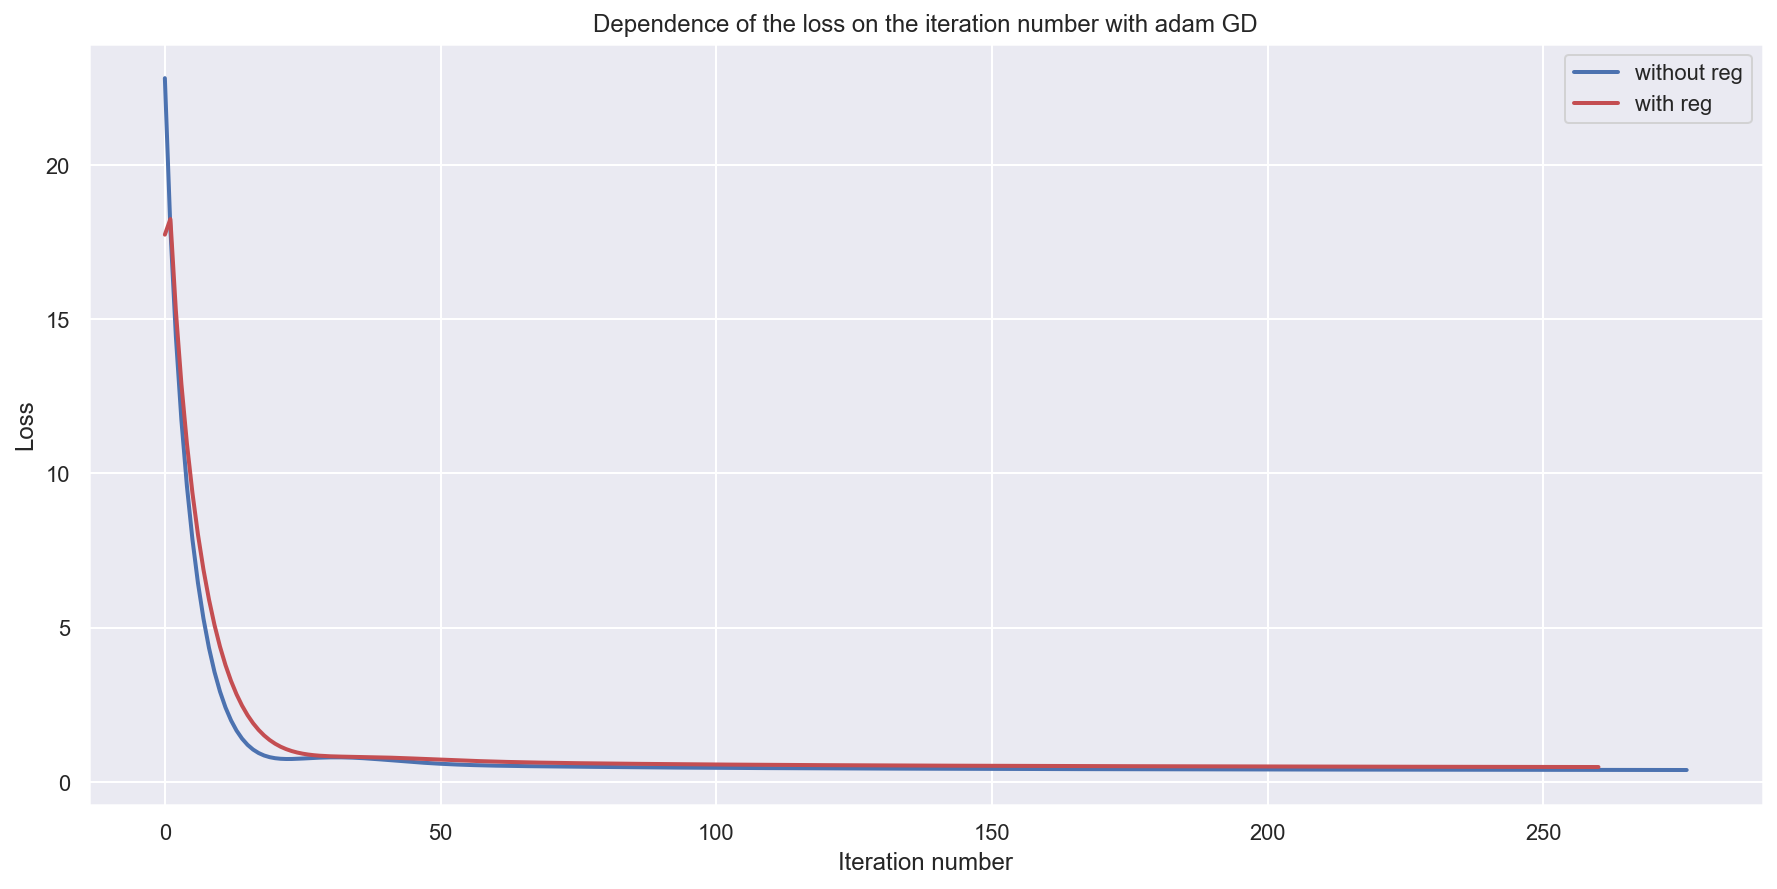

In [58]:
plt.rcParams['figure.figsize'] = 15, 7
get_label = lambda i: f'with reg' if i else f'without reg'
colors = ['b', 'r']
for descent in ['stochastic', 'full', 'momentum', 'adam']:
    for i in range(2):
        if not i:
            descent_config = {
                'descent_name': descent,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': best_lr[descent]
                }
            }
        else:
            descent_config = {
                'descent_name': descent,
                'regularized': True,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': best_lr_mu[descent][0],
                    'mu': best_lr_mu[descent][1]
                }
            }

        regression = LinearRegression(
            descent_config=descent_config,
            max_iter = 100500
        )

        regression.fit(X_train, y_train)
        iters = np.arange(0, len(regression.loss_history), 1)
        plt.plot(iters, regression.loss_history, label=get_label(i), color=colors[i], linewidth=2)

    plt.xlabel("Iteration number")
    plt.ylabel("Loss")
    plt.title(f'Dependence of the loss on the iteration number with {descent} GD')
    plt.legend()
    plt.show()

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

1. Регуляризация увеличивает количество итераций, необходимых для наступления сходимости - это можно увидеть как на графиках, так и в таблице с метриками
2. Как на обучающей, так и на тестовой выборке качество достаточно сильно упало, и это справедливо для всех методов.
3. Падение качества можно объяснить тем, что регуляризация искуственно занижает некоторые коэффициенты, из-за чего качество предсказания падает, ведь оно не может так хорошо подстроиться под данные. Судя по всему, без регуляризации переобучение и так не возникало, так что ее введение не сделало ситуацию лучше. Что касается замедления сходимости - регуляризация как бы мешает градиенту спускаться прямо к минимуму, корректируя его, поэтому и увеличивается количество итераций для сходимости.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    \nabla_{w} Q(w) = - \dfrac{1}{\ell} th\left( y - Xw \right)^T  X 
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [59]:
from descents import LossFunction

Поскольку не для всех методов в инициализации была прописана функция потерь, пришлось прописать ее в файле `descents.py`

Descent: stochastic


  0%|          | 0/10 [00:00<?, ?it/s]

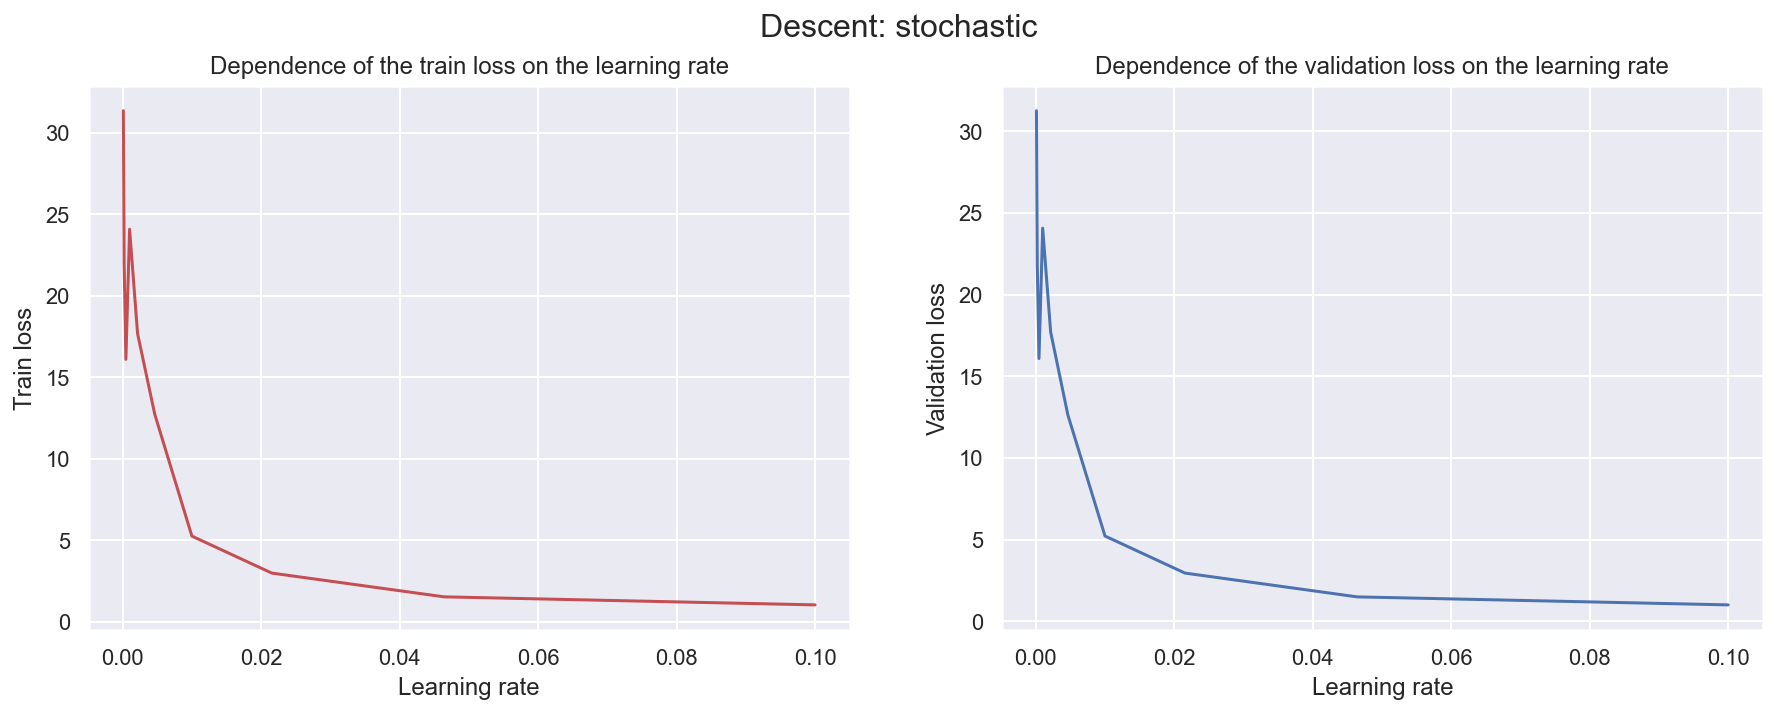

Descent: full


  0%|          | 0/10 [00:00<?, ?it/s]

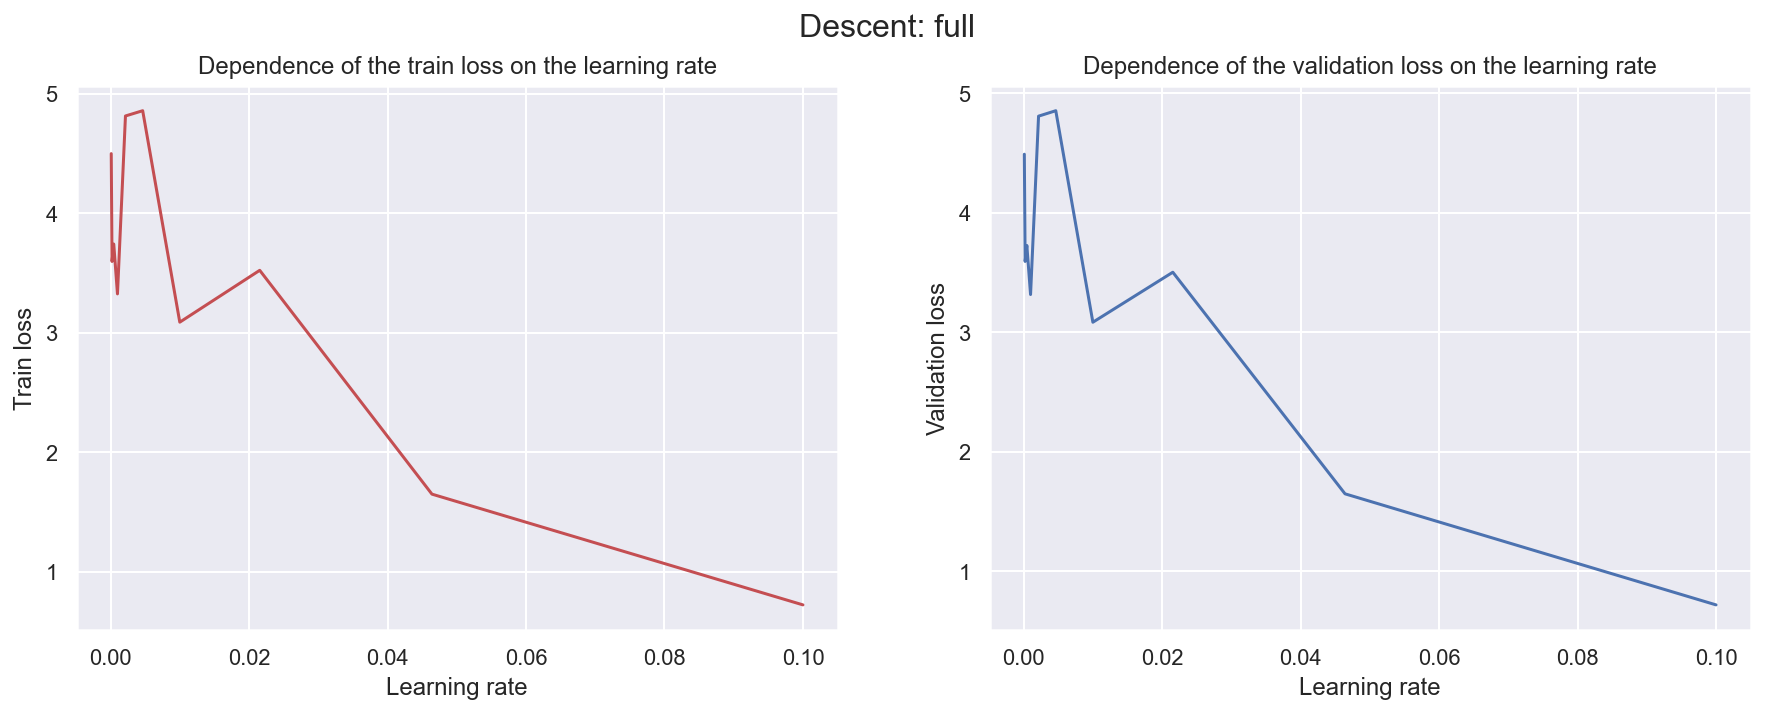

Descent: momentum


  0%|          | 0/10 [00:00<?, ?it/s]

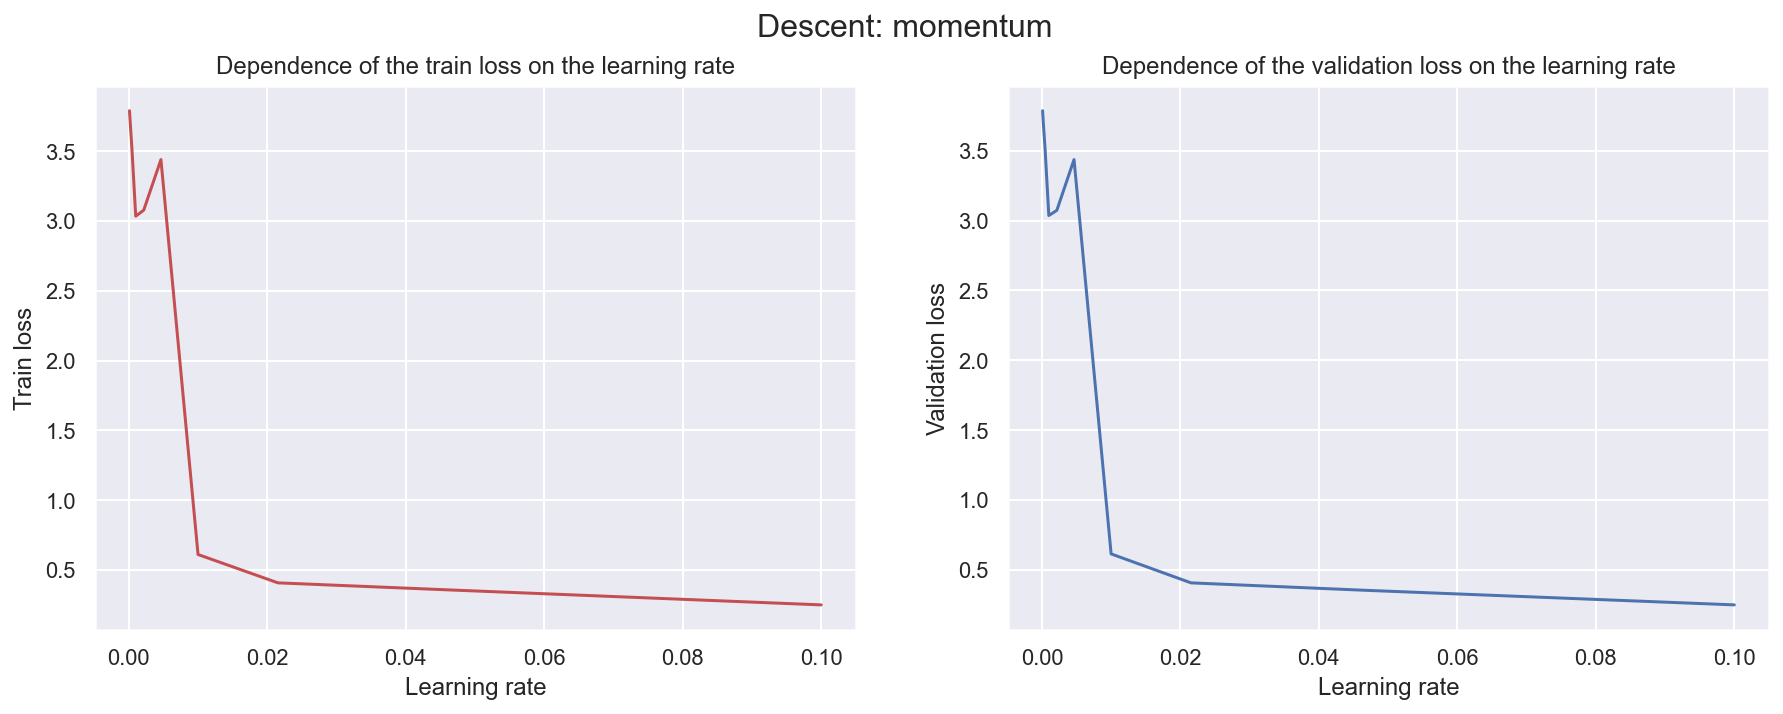

Descent: adam


  0%|          | 0/10 [00:00<?, ?it/s]

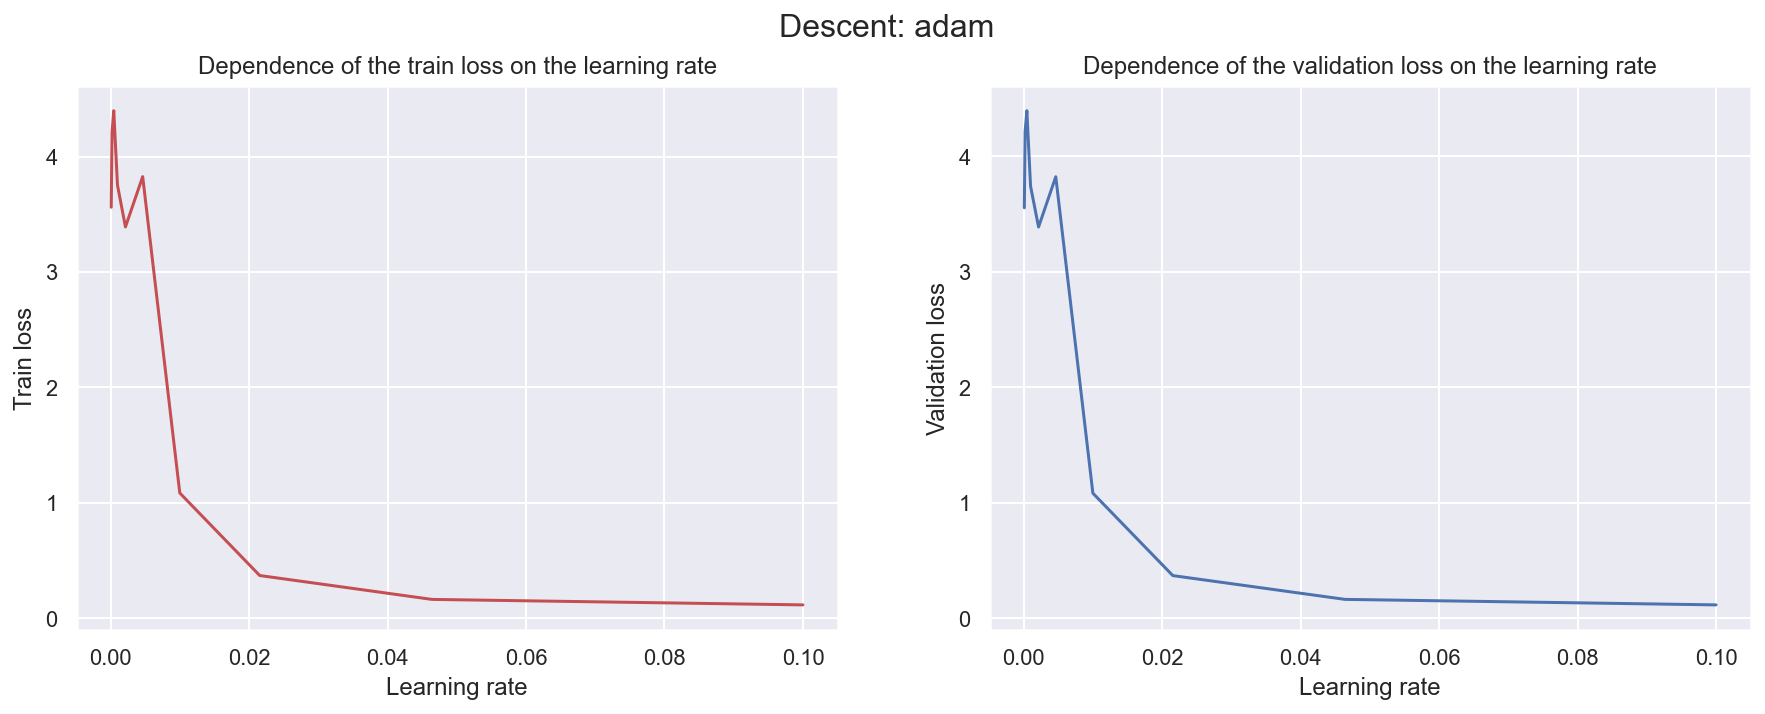

In [60]:
dimension = X_train.shape[1]

# словарь, в который будем записывать длину шага с минимальной ошибкой на валидационной выборке
best_lr_lc = dict()

for descent in ['stochastic', 'full', 'momentum', 'adam']:
    val_losses = []
    train_losses = []
    print(f'Descent: {descent}')
    for lr in tqdm(lrs):
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': dimension,
                'lambda_': lr,
                'loss_function': LossFunction.LogCosh
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )
        # regression.descent.loss_function = LossFunction.LogCosh

        regression.fit(X_train, y_train)
        val_losses.append(regression.calc_loss(X_val, y_val))
        train_losses.append(regression.loss_history[-1])
        
        if val_losses[-1] == min(val_losses):
            best_lr_lc[descent] = lr
            
    plot(lrs, train_losses, val_losses, descent)

In [61]:
best_lr_lc

{'stochastic': 0.1, 'full': 0.1, 'momentum': 0.1, 'adam': 0.1}

In [62]:
log_train_loss = dict()
log_test_loss = dict()
log_max_iter = dict()
log_r2 = dict()

for descent in ['stochastic', 'full', 'momentum', 'adam']:
    descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': dimension,
            'lambda_': best_lr_lc[descent]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
        max_iter = 100500
    )

    regression.fit(X_train, y_train)
    log_train_loss[descent] = regression.calc_loss(X_train, y_train)
    log_test_loss[descent] = regression.calc_loss(X_test, y_test)
    log_max_iter[descent] = len(regression.loss_history) - 1
    log_r2[descent] = r2_score(y_test, regression.predict(X_test))
    print(f'GD: {descent} - done')

GD: stochastic - done
GD: full - done
GD: momentum - done
GD: adam - done


In [63]:
get_vals(log_r2)

[0.2125407761085819,
 0.22456337964544515,
 0.6721415496068256,
 0.6671854010871504]

In [64]:
gdlog_stats = np.array([get_vals(log_train_loss), 
                     get_vals(log_test_loss),
                     get_vals(log_r2),
                     get_vals(log_max_iter)]).T

In [65]:
gdlog_stats = np.array([get_vals(log_train_loss), 
                     get_vals(log_test_loss),
                     get_vals(log_r2),
                     get_vals(log_max_iter)]).T

gdlog_stats = pd.DataFrame(gdlog_stats,
                        index=list(log_train_loss.keys()),
                        columns=['train_loss', 'test_loss', 'test_r2', 'iter_required'])
gdlog_stats['iter_required'] = gdlog_stats['iter_required'].astype(int)
gdlog_stats = gdlog_stats.round({'train_loss': 2, 'test_loss': 2, 'test_r2': 2})
gdlog_stats

,train_loss,test_loss,test_r2,iter_required
stochastic,1.00,1.00,0.21,47
full,0.99,0.98,0.22,29
momentum,0.42,0.42,0.67,83
adam,0.43,0.42,0.67,339


**Выводы:**
1. Ошибки на стохастическом и на полном градиентных спусках немного упали, $R^2$ осталась примерно на том же уровне, а вот количество шагов до сходимости увеличилось только у стохастического спуска
2. Для метода `momentum` ошибка тоже немного упала и метрика $R^2$ не изменилась, количество требуемых итераций практически не поменялось
3. Что касается метода `Adam` - для него ошибка, наоборот, несколько выросла, хотя и незначительно, а метрика $R^2$ и количество шагов до сходимости тоже остались примерно на прежнем уровне. 

**Итог:** Можно сказать, что функция потерь `LogCosh` дает примерно тот же результат, что и `MSE`. 

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

![Прогулка](социализационный_бонус.jpeg)
Вообще весело было, но гулять по Москве ночью холодно

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE:

## Ссылки:
* [Adam](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)